In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import patsy

In [2]:
zingat = pd.read_excel("zingat_house_price_prediction.xlsx", index_col=0)
zingat

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
0,F.BAHÇE'DE SIFIR 200M2 KAPANMAZ MARİNA VE DENİ...,Fenerbahçe,12.950.000,150.0,200,4+1,4,1,1,27.0
1,BOSTANCI SAHİLDE FULL+FULL DENİZ MANZARALI SAT...,Bostancı,11.400.000,188.0,230,2+1,2,1,1,35.0
2,Feneryolu Marmaray ve Özgürlük Parkı Bağdat C....,Feneryolu,3.350.000,70.0,101,2+1,2,1,1,20.0
3,HALİTAĞA CADDESİ'NDE 100M2 SATILIK TERAS KAT D...,Osmanağa,850,100.0,110,2+1,2,1,1,12.0
4,GÖZTEPE'DE 3 YILLIK MARMARAYA YAKIN 135M2 BALK...,Göztepe,3.750.000,98.0,135,3+1,3,1,1,19.0
...,...,...,...,...,...,...,...,...,...,...
867,Fenerbahçe Ordu Evi Ayanoğlu Caddesi 3+1 Sıfır...,Fenerbahçe,3.800.000,122.0,155,3+1,3,1,2,15.0
868,Kalamış Marinaya Yakın 100 m2 Bahçe Kullanım D...,Fenerbahçe,2.850.000,188.0,206,2+1,2,1,1,12.0
869,SUADİYE BÜYÜKHANLI KONUTLARINDA TEK DAİRE FİYA...,Suadiye,7.600.000,NaN,520,9+1,9,1,3,19.0
870,YATIRIMLIK!!KADIKOY YELDEĞİRMENİ SATILIK 3+1 1...,Rasimpaşa,1.150.000,127.0,192,3+1,3,1,2,31.0


In [3]:
df = pd.DataFrame(zingat)
df

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
0,F.BAHÇE'DE SIFIR 200M2 KAPANMAZ MARİNA VE DENİ...,Fenerbahçe,12.950.000,150.0,200,4+1,4,1,1,27.0
1,BOSTANCI SAHİLDE FULL+FULL DENİZ MANZARALI SAT...,Bostancı,11.400.000,188.0,230,2+1,2,1,1,35.0
2,Feneryolu Marmaray ve Özgürlük Parkı Bağdat C....,Feneryolu,3.350.000,70.0,101,2+1,2,1,1,20.0
3,HALİTAĞA CADDESİ'NDE 100M2 SATILIK TERAS KAT D...,Osmanağa,850,100.0,110,2+1,2,1,1,12.0
4,GÖZTEPE'DE 3 YILLIK MARMARAYA YAKIN 135M2 BALK...,Göztepe,3.750.000,98.0,135,3+1,3,1,1,19.0
...,...,...,...,...,...,...,...,...,...,...
867,Fenerbahçe Ordu Evi Ayanoğlu Caddesi 3+1 Sıfır...,Fenerbahçe,3.800.000,122.0,155,3+1,3,1,2,15.0
868,Kalamış Marinaya Yakın 100 m2 Bahçe Kullanım D...,Fenerbahçe,2.850.000,188.0,206,2+1,2,1,1,12.0
869,SUADİYE BÜYÜKHANLI KONUTLARINDA TEK DAİRE FİYA...,Suadiye,7.600.000,NaN,520,9+1,9,1,3,19.0
870,YATIRIMLIK!!KADIKOY YELDEĞİRMENİ SATILIK 3+1 1...,Rasimpaşa,1.150.000,127.0,192,3+1,3,1,2,31.0


# General Information About Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 871
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   İLAN ADI          871 non-null    object 
 1   MAHALLE           871 non-null    object 
 2   FİYAT             871 non-null    object 
 3   NET(m²)           870 non-null    float64
 4   BRÜT(m²)          871 non-null    int64  
 5   ODA-SALON SAYISI  863 non-null    object 
 6   ODA SAYISI        871 non-null    int64  
 7   SALON SAYISI      868 non-null    object 
 8   BANYO SAYISI      871 non-null    int64  
 9   FOTOĞRAF SAYISI   842 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 74.9+ KB


In [5]:
df.isnull().sum()

İLAN ADI             0
MAHALLE              0
FİYAT                0
NET(m²)              1
BRÜT(m²)             0
ODA-SALON SAYISI     8
ODA SAYISI           0
SALON SAYISI         3
BANYO SAYISI         0
FOTOĞRAF SAYISI     29
dtype: int64

In [6]:
df.head()

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
0,F.BAHÇE'DE SIFIR 200M2 KAPANMAZ MARİNA VE DENİ...,Fenerbahçe,12.950.000,150.0,200,4+1,4,1,1,27.0
1,BOSTANCI SAHİLDE FULL+FULL DENİZ MANZARALI SAT...,Bostancı,11.400.000,188.0,230,2+1,2,1,1,35.0
2,Feneryolu Marmaray ve Özgürlük Parkı Bağdat C....,Feneryolu,3.350.000,70.0,101,2+1,2,1,1,20.0
3,HALİTAĞA CADDESİ'NDE 100M2 SATILIK TERAS KAT D...,Osmanağa,850,100.0,110,2+1,2,1,1,12.0
4,GÖZTEPE'DE 3 YILLIK MARMARAYA YAKIN 135M2 BALK...,Göztepe,3.750.000,98.0,135,3+1,3,1,1,19.0


In [7]:
df.tail()

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
867,Fenerbahçe Ordu Evi Ayanoğlu Caddesi 3+1 Sıfır...,Fenerbahçe,3.800.000,122.0,155,3+1,3,1,2,15.0
868,Kalamış Marinaya Yakın 100 m2 Bahçe Kullanım D...,Fenerbahçe,2.850.000,188.0,206,2+1,2,1,1,12.0
869,SUADİYE BÜYÜKHANLI KONUTLARINDA TEK DAİRE FİYA...,Suadiye,7.600.000,NaN,520,9+1,9,1,3,19.0
870,YATIRIMLIK!!KADIKOY YELDEĞİRMENİ SATILIK 3+1 1...,Rasimpaşa,1.150.000,127.0,192,3+1,3,1,2,31.0
871,KADIKÖY YELDEĞİRMENİN'DE SATILIK 3+1 192m2 SI...,Rasimpaşa,1.150.000,140.0,197,3+1,3,1,6,21.0


In [8]:
df.sample(10, random_state = 43)

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
410,ÇİFTEHAVUZLAR DA SAHİLE VE BAĞDAT CADDESİNE ÇO...,Fenerbahçe,1.850.000,38.0,48,1+1,1,1,2,5.0
426,Suadiye Sahil Deniz Manzaralı Teraslı Dubleks ...,Suadiye,16.000.000,246.0,300,4+1,4,1,2,26.0
251,"GÖZTEPE'DE,MİNİBÜS CAD.YÜRÜME MESAFESİNDE,BAHÇ...",Eğitim,1.550.000,110.0,140,3+1,3,1,2,15.0
730,Erenköyde Marmaraya Yakın Yeni Binada 3+1 Balk...,Erenköy,5.250.000,128.0,160,3+1,3,1,3,25.0
67,KOZYATAĞI MERKEZİ KONUMDA YATIRIMLIK FIRSAT ...,Kozyatağı,1.525.000,75.0,90,2+1,2,1,1,2.0
11,CADDEBOSTAN SAHİLDE 240m2 DEPREM SONRASI MANZA...,Caddebostan,8.000.000,190.0,240,6+1,6,1,1,31.0
831,Kozyatağında Bayar Caddesine Yakın 3+1 Yenilen...,19 Mayıs,2.145.000,90.0,125,3+1,3,1,4,23.0
560,MODA SAHİL DE MUHTEŞEM DENİZ MANZARALI AYRICAL...,Caferağa,11.000.000,133.0,177,3+1,3,1,2,26.0
186,MTS PRIME EMLAK-YETKİLİ,Fenerbahçe,9.750.000,180.0,220,4+1,4,1,2,26.0
250,SAHRAYICEDİT DE YATIRIMLIK 2+1 DAİRE,Sahrayı Cedit,1.150.000,75.0,90,2+1,2,1,2,8.0


## Reorganize Data

In [9]:
photo_median = df.iloc[:,-1].median()
photo_median

24.0

In [10]:
df.iloc[:,-1].fillna(photo_median, inplace=True)

In [11]:
net_median = df["NET(m²)"].median()
net_median

127.0

In [12]:
df["NET(m²)"].fillna(net_median, inplace=True)

In [45]:
salon_median = df["SALON SAYISI"].median()
salon_median

1.0

In [46]:
df["SALON SAYISI"].fillna(salon_median, inplace=True)

In [13]:
df.dropna(subset=["ODA-SALON SAYISI"], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 871
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   İLAN ADI          863 non-null    object 
 1   MAHALLE           863 non-null    object 
 2   FİYAT             863 non-null    object 
 3   NET(m²)           863 non-null    float64
 4   BRÜT(m²)          863 non-null    int64  
 5   ODA-SALON SAYISI  863 non-null    object 
 6   ODA SAYISI        863 non-null    int64  
 7   SALON SAYISI      863 non-null    object 
 8   BANYO SAYISI      863 non-null    int64  
 9   FOTOĞRAF SAYISI   863 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 74.2+ KB


In [15]:
df["FİYAT"] = df["FİYAT"].apply(lambda x : str(x).replace(".","")).astype(int)
df["NET(m²)"] = df["NET(m²)"].astype(int)
df["BANYO SAYISI"] = df["BANYO SAYISI"].apply(lambda x : str(x).replace("0  TL  (aylık)",""))
df["SALON SAYISI"] = df["SALON SAYISI"].astype(int)
df["BANYO SAYISI"] = df["BANYO SAYISI"].astype(int)
df["FOTOĞRAF SAYISI"] = df["FOTOĞRAF SAYISI"].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 871
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN ADI          863 non-null    object
 1   MAHALLE           863 non-null    object
 2   FİYAT             863 non-null    int32 
 3   NET(m²)           863 non-null    int32 
 4   BRÜT(m²)          863 non-null    int64 
 5   ODA-SALON SAYISI  863 non-null    object
 6   ODA SAYISI        863 non-null    int64 
 7   SALON SAYISI      863 non-null    int32 
 8   BANYO SAYISI      863 non-null    int32 
 9   FOTOĞRAF SAYISI   863 non-null    int32 
dtypes: int32(5), int64(2), object(3)
memory usage: 57.3+ KB


In [17]:
df

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
0,F.BAHÇE'DE SIFIR 200M2 KAPANMAZ MARİNA VE DENİ...,Fenerbahçe,12950000,150,200,4+1,4,1,1,27
1,BOSTANCI SAHİLDE FULL+FULL DENİZ MANZARALI SAT...,Bostancı,11400000,188,230,2+1,2,1,1,35
2,Feneryolu Marmaray ve Özgürlük Parkı Bağdat C....,Feneryolu,3350000,70,101,2+1,2,1,1,20
3,HALİTAĞA CADDESİ'NDE 100M2 SATILIK TERAS KAT D...,Osmanağa,850,100,110,2+1,2,1,1,12
4,GÖZTEPE'DE 3 YILLIK MARMARAYA YAKIN 135M2 BALK...,Göztepe,3750000,98,135,3+1,3,1,1,19
...,...,...,...,...,...,...,...,...,...,...
867,Fenerbahçe Ordu Evi Ayanoğlu Caddesi 3+1 Sıfır...,Fenerbahçe,3800000,122,155,3+1,3,1,2,15
868,Kalamış Marinaya Yakın 100 m2 Bahçe Kullanım D...,Fenerbahçe,2850000,188,206,2+1,2,1,1,12
869,SUADİYE BÜYÜKHANLI KONUTLARINDA TEK DAİRE FİYA...,Suadiye,7600000,127,520,9+1,9,1,3,19
870,YATIRIMLIK!!KADIKOY YELDEĞİRMENİ SATILIK 3+1 1...,Rasimpaşa,1150000,127,192,3+1,3,1,2,31


In [18]:
mask = (df["FİYAT"] > 25000000)
df[mask]

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
80,A+ SATILIK MUHTEŞEM DAİRE RAGIP PAŞA KORUSU Sİ...,Caddebostan,37400000,310,416,7+2,7,2,1,36
105,Fenerbahçe Deniz Manzaralı 90 m2 Salon 5 Araçl...,Fenerbahçe,33000000,213,290,5+1,5,1,1,25
254,Prens Adaları Topkapı Sarayı Ayasofya kapanmaz...,Fenerbahçe,26500000,300,400,5+2,5,2,2,12
361,Fenerbahçe Deniz - Marina ve Doğa Manzaralı Yü...,Fenerbahçe,35000000,420,550,4+2,4,2,2,6
416,FENERBAHÇE DALYAN KONAKLARI SATILIK 4+1 TERS D...,Fenerbahçe,32000000,320,430,4+1,4,1,2,30
592,Caddebostan Khalkedon Evlerinde Ön Blokta Satı...,Feneryolu,30000000,325,385,3+2,3,2,2,13
664,Fenerbahçe Dalyan Deniz Manzaralı Yüzme Havuzu...,Fenerbahçe,36000000,280,350,5+2,5,2,3,16
833,OPTİMA'DAN CADDEBOSTAN SAHİLDE KAPANMAZ KORU v...,Caddebostan,40000000,350,420,4+2,4,2,4,36


In [19]:
another_df = df.drop(columns= "ODA-SALON SAYISI")
another_df

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
0,F.BAHÇE'DE SIFIR 200M2 KAPANMAZ MARİNA VE DENİ...,Fenerbahçe,12950000,150,200,4,1,1,27
1,BOSTANCI SAHİLDE FULL+FULL DENİZ MANZARALI SAT...,Bostancı,11400000,188,230,2,1,1,35
2,Feneryolu Marmaray ve Özgürlük Parkı Bağdat C....,Feneryolu,3350000,70,101,2,1,1,20
3,HALİTAĞA CADDESİ'NDE 100M2 SATILIK TERAS KAT D...,Osmanağa,850,100,110,2,1,1,12
4,GÖZTEPE'DE 3 YILLIK MARMARAYA YAKIN 135M2 BALK...,Göztepe,3750000,98,135,3,1,1,19
...,...,...,...,...,...,...,...,...,...
867,Fenerbahçe Ordu Evi Ayanoğlu Caddesi 3+1 Sıfır...,Fenerbahçe,3800000,122,155,3,1,2,15
868,Kalamış Marinaya Yakın 100 m2 Bahçe Kullanım D...,Fenerbahçe,2850000,188,206,2,1,1,12
869,SUADİYE BÜYÜKHANLI KONUTLARINDA TEK DAİRE FİYA...,Suadiye,7600000,127,520,9,1,3,19
870,YATIRIMLIK!!KADIKOY YELDEĞİRMENİ SATILIK 3+1 1...,Rasimpaşa,1150000,127,192,3,1,2,31


In [20]:
DF = another_df.iloc[:,2:]
DF

,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
0,12950000,150,200,4,1,1,27
1,11400000,188,230,2,1,1,35
2,3350000,70,101,2,1,1,20
3,850,100,110,2,1,1,12
4,3750000,98,135,3,1,1,19
...,...,...,...,...,...,...,...
867,3800000,122,155,3,1,2,15
868,2850000,188,206,2,1,1,12
869,7600000,127,520,9,1,3,19
870,1150000,127,192,3,1,2,31


In [21]:
df["MAHALLE"].unique()

array(['Fenerbahçe', 'Bostancı', 'Feneryolu', 'Osmanağa', 'Göztepe',
       'Caddebostan', 'Acıbadem', 'Suadiye', 'Sahrayı Cedit', 'Erenköy',
       'Hasanpaşa', 'Merdivenköy', 'Kozyatağı', '19 Mayıs', 'Zühtüpaşa',
       'Eğitim', 'Caferağa', 'Dumlupınar', 'Koşuyolu', 'Fikirtepe',
       'Rasimpaşa'], dtype=object)

In [22]:
new_df = pd.get_dummies(df, columns=["MAHALLE"])
new_df.drop(columns="ODA-SALON SAYISI", inplace=True)
new_df.drop(columns="İLAN ADI", inplace=True)
new_df

,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI,MAHALLE_19 Mayıs,MAHALLE_Acıbadem,MAHALLE_Bostancı,...,MAHALLE_Göztepe,MAHALLE_Hasanpaşa,MAHALLE_Kozyatağı,MAHALLE_Koşuyolu,MAHALLE_Merdivenköy,MAHALLE_Osmanağa,MAHALLE_Rasimpaşa,MAHALLE_Sahrayı Cedit,MAHALLE_Suadiye,MAHALLE_Zühtüpaşa
0,12950000,150,200,4,1,1,27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11400000,188,230,2,1,1,35,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3350000,70,101,2,1,1,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,850,100,110,2,1,1,12,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3750000,98,135,3,1,1,19,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,3800000,122,155,3,1,2,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
868,2850000,188,206,2,1,1,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
869,7600000,127,520,9,1,3,19,0,0,0,...,0,0,0,0,0,0,0,0,1,0
870,1150000,127,192,3,1,2,31,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
new_df.sort_values("FİYAT")

,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI,MAHALLE_19 Mayıs,MAHALLE_Acıbadem,MAHALLE_Bostancı,...,MAHALLE_Göztepe,MAHALLE_Hasanpaşa,MAHALLE_Kozyatağı,MAHALLE_Koşuyolu,MAHALLE_Merdivenköy,MAHALLE_Osmanağa,MAHALLE_Rasimpaşa,MAHALLE_Sahrayı Cedit,MAHALLE_Suadiye,MAHALLE_Zühtüpaşa
146,770,36,58,1,0,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,850,100,110,2,1,1,12,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45,900,80,100,2,1,1,26,0,0,0,...,0,1,0,0,0,0,0,0,0,0
134,940,80,85,3,1,1,27,0,0,0,...,0,1,0,0,0,0,0,0,0,0
581,1000000,60,75,2,1,2,32,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,33000000,213,290,5,1,1,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
361,35000000,420,550,4,2,2,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,36000000,280,350,5,2,3,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,37400000,310,416,7,2,1,36,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
new_df.iloc[138:139,0:1] = int(850000)
new_df.iloc[3:4,0:1] = int(850000)
new_df.iloc[45:46,0:1] = int(900000)
new_df.iloc[126:127,0:1] = int(940000)

In [25]:
new_df.sort_values("FİYAT")

,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI,MAHALLE_19 Mayıs,MAHALLE_Acıbadem,MAHALLE_Bostancı,...,MAHALLE_Göztepe,MAHALLE_Hasanpaşa,MAHALLE_Kozyatağı,MAHALLE_Koşuyolu,MAHALLE_Merdivenköy,MAHALLE_Osmanağa,MAHALLE_Rasimpaşa,MAHALLE_Sahrayı Cedit,MAHALLE_Suadiye,MAHALLE_Zühtüpaşa
3,850000,100,110,2,1,1,12,0,0,0,...,0,0,0,0,0,1,0,0,0,0
146,850000,36,58,1,0,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,900000,80,100,2,1,1,26,0,0,0,...,0,1,0,0,0,0,0,0,0,0
134,940000,80,85,3,1,1,27,0,0,0,...,0,1,0,0,0,0,0,0,0,0
581,1000000,60,75,2,1,2,32,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,33000000,213,290,5,1,1,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
361,35000000,420,550,4,2,2,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,36000000,280,350,5,2,3,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,37400000,310,416,7,2,1,36,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 871
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN ADI          863 non-null    object
 1   MAHALLE           863 non-null    object
 2   FİYAT             863 non-null    int32 
 3   NET(m²)           863 non-null    int32 
 4   BRÜT(m²)          863 non-null    int64 
 5   ODA-SALON SAYISI  863 non-null    object
 6   ODA SAYISI        863 non-null    int64 
 7   SALON SAYISI      863 non-null    int32 
 8   BANYO SAYISI      863 non-null    int32 
 9   FOTOĞRAF SAYISI   863 non-null    int32 
dtypes: int32(5), int64(2), object(3)
memory usage: 57.3+ KB


<AxesSubplot:title={'center':'KADIKÖY İLÇESİNDEKİ EV FİYATLARININ DAĞILIMI'}, xlabel='FİYAT', ylabel='Count'>

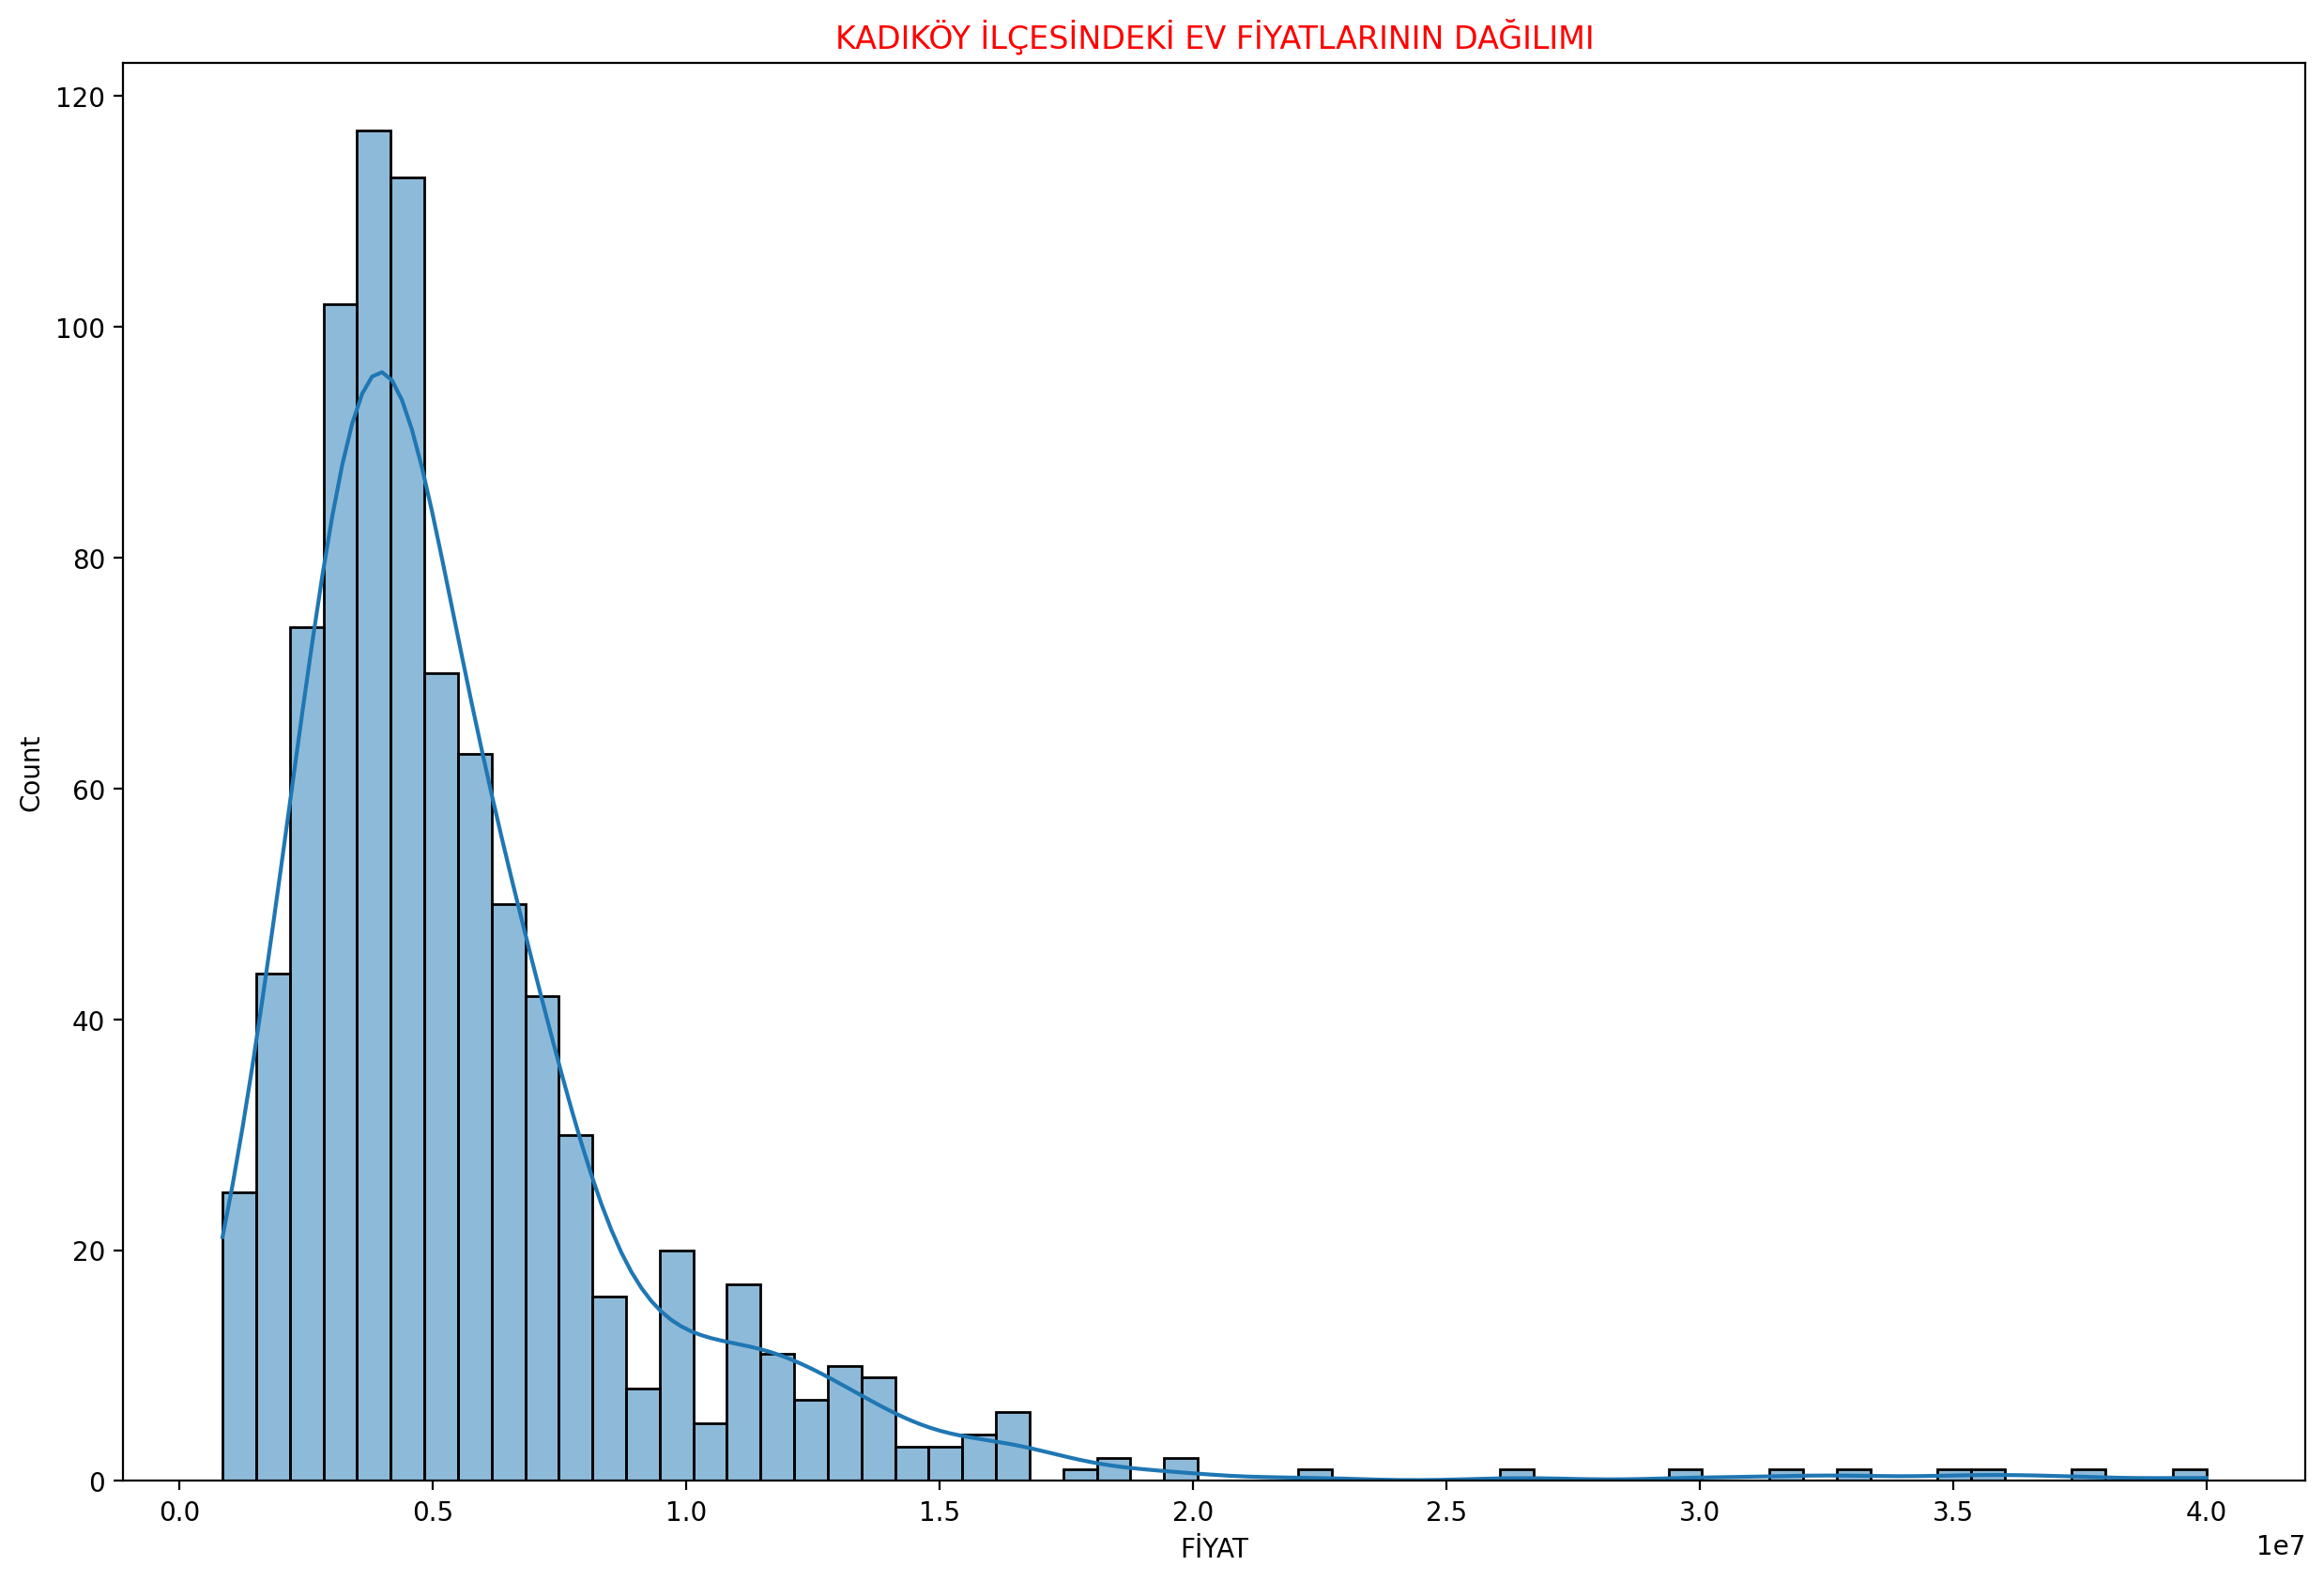

In [27]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("KADIKÖY İLÇESİNDEKİ EV FİYATLARININ DAĞILIMI", c="red")
sns.histplot(data=new_df, x="FİYAT", kde=True)
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project2/08_HousePriceDistributioninKadıköy.png', dpi=200)

In [28]:
house_price_neighbourhood = df.groupby("MAHALLE").mean().sort_values("FİYAT", ascending = False).reset_index().iloc[:,:2].head(10)
house_price_neighbourhood

,MAHALLE,FİYAT
0,Fenerbahçe,8.135940e+06
1,Caddebostan,7.862409e+06
2,Suadiye,6.254634e+06
3,Acıbadem,5.915333e+06
4,Caferağa,5.426875e+06
5,Fikirtepe,5.250000e+06
6,Erenköy,4.761319e+06
7,Göztepe,4.385041e+06
8,Feneryolu,4.362500e+06
9,Bostancı,4.080185e+06


<AxesSubplot:title={'center':'KADIKÖY İLÇESİNDEKİ ORTALAMA EV FİYATLARI EN YÜKSEK İLK 10 MAHALLE'}, xlabel='MAHALLE', ylabel='FİYAT'>

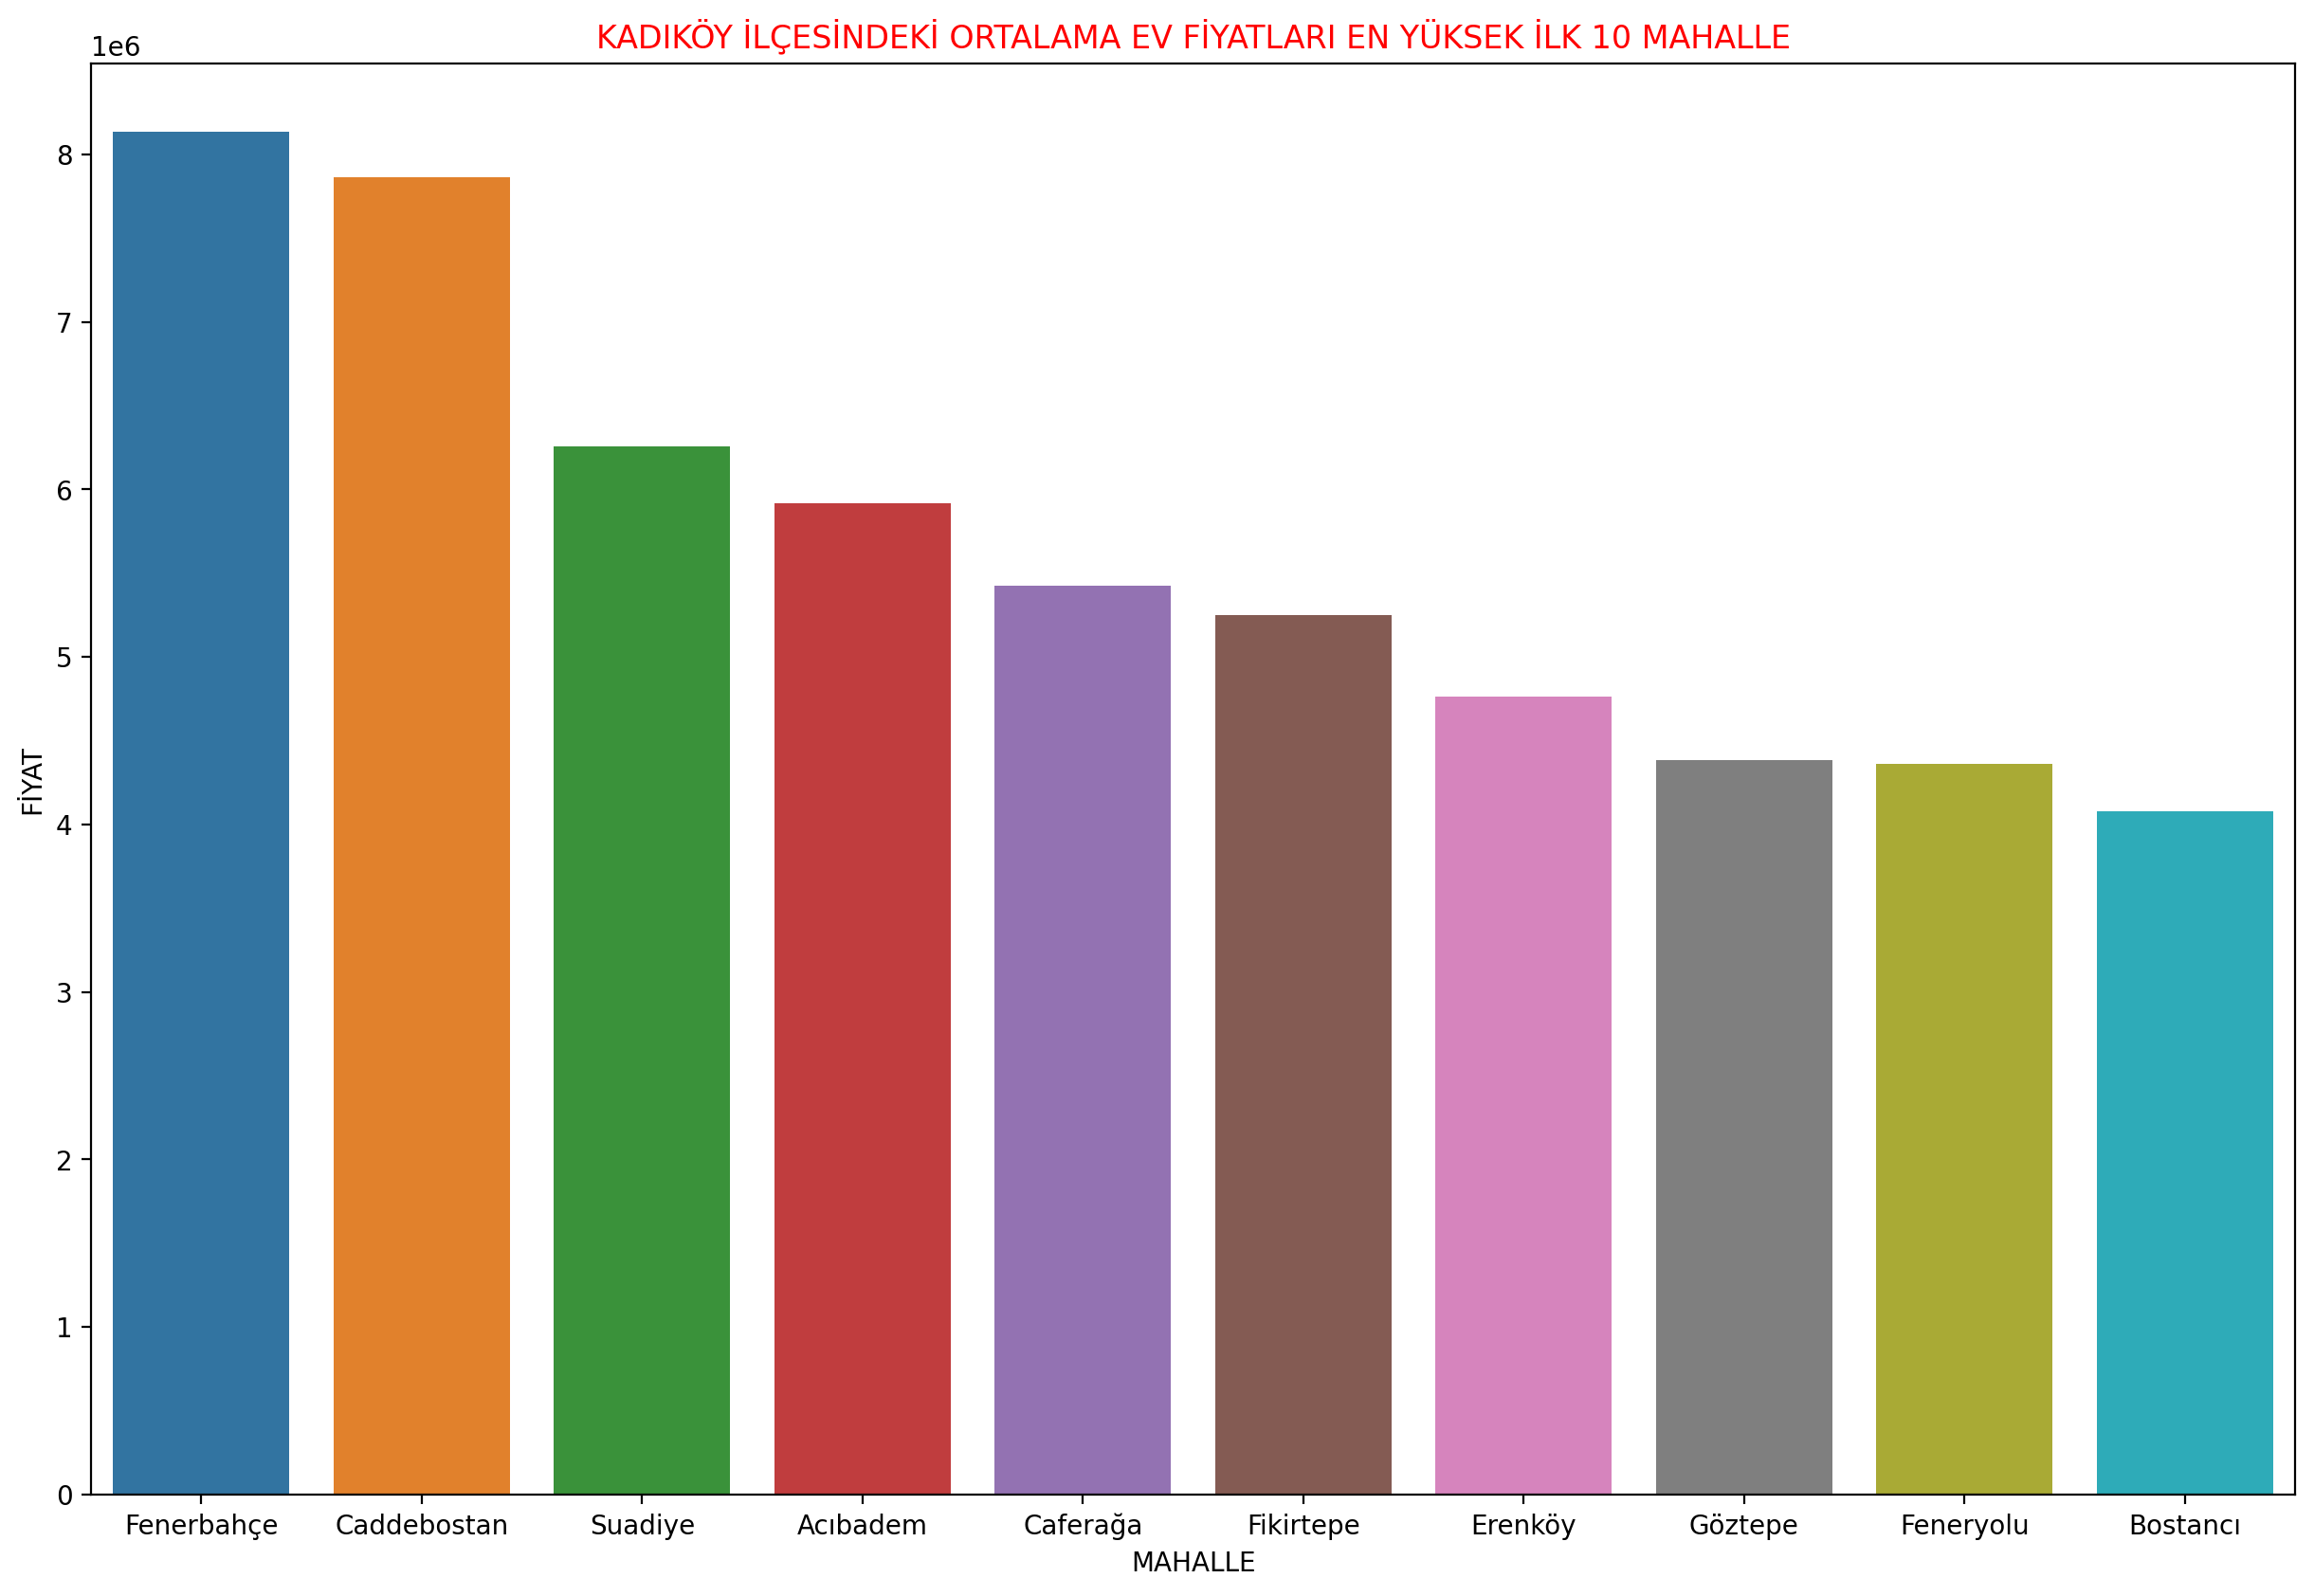

In [29]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("KADIKÖY İLÇESİNDEKİ ORTALAMA EV FİYATLARI EN YÜKSEK İLK 10 MAHALLE", c="red")
sns.barplot(x = 'MAHALLE', y = 'FİYAT', data = house_price_neighbourhood)
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project2/01_HousePriceNeighbourhood.png', dpi=200)

In [30]:
oda_salon = df.groupby("ODA-SALON SAYISI").count().reset_index().iloc[:,:2]
oda_salon

,ODA-SALON SAYISI,İLAN ADI
0,1+0 (Stüdyo),1
1,1+1,7
2,2+1,89
3,2+2,1
4,3+1,408
5,3+2,20
6,4+1,153
7,4+2,71
8,4+3,1
9,5+1,42


Text(0, 0.5, 'İLAN SAYISI')

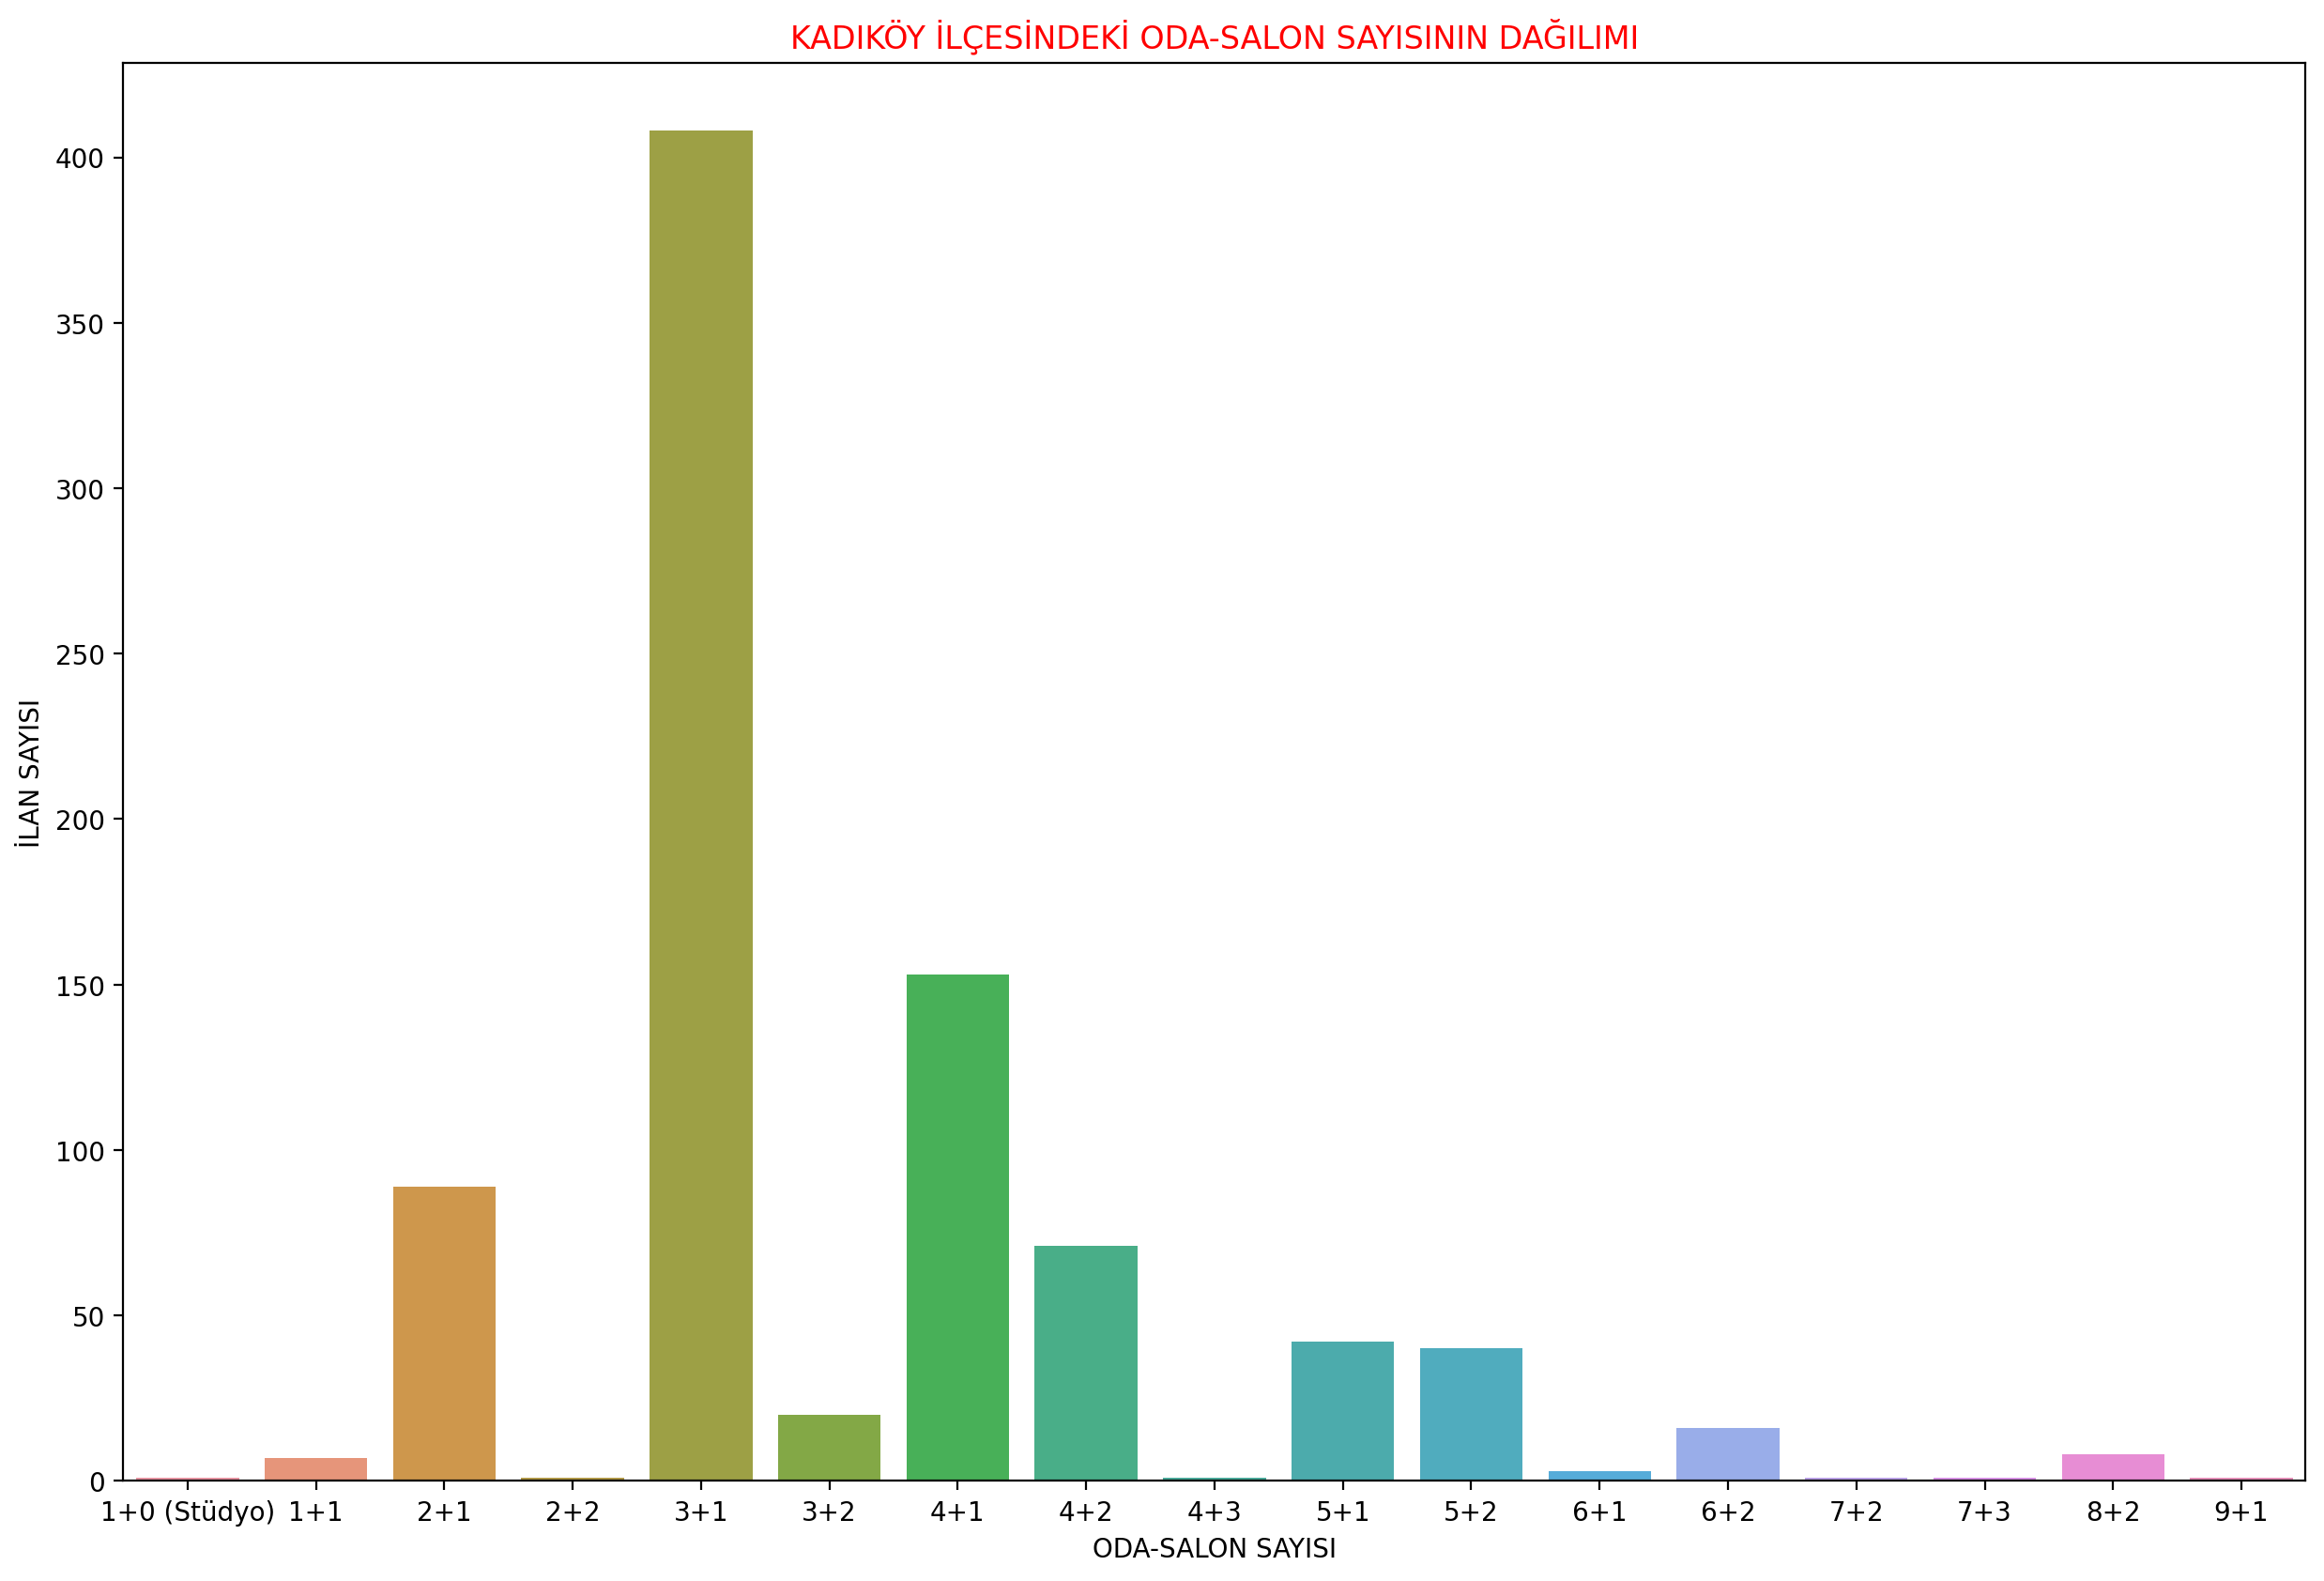

In [31]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("KADIKÖY İLÇESİNDEKİ ODA-SALON SAYISININ DAĞILIMI", c="red")
sns.barplot(x = 'ODA-SALON SAYISI', y = 'İLAN ADI', data = oda_salon)
plt.ylabel("İLAN SAYISI")
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project2/02_DistributionofNumberofRoom.png', dpi=200)

In [32]:
banyo = df.groupby("BANYO SAYISI").count().iloc[:,0:1].reset_index()
banyo

,BANYO SAYISI,İLAN ADI
0,1,148
1,2,500
2,3,164
3,4,42
4,5,8
5,6,1


Text(0, 0.5, 'İLAN SAYISI')

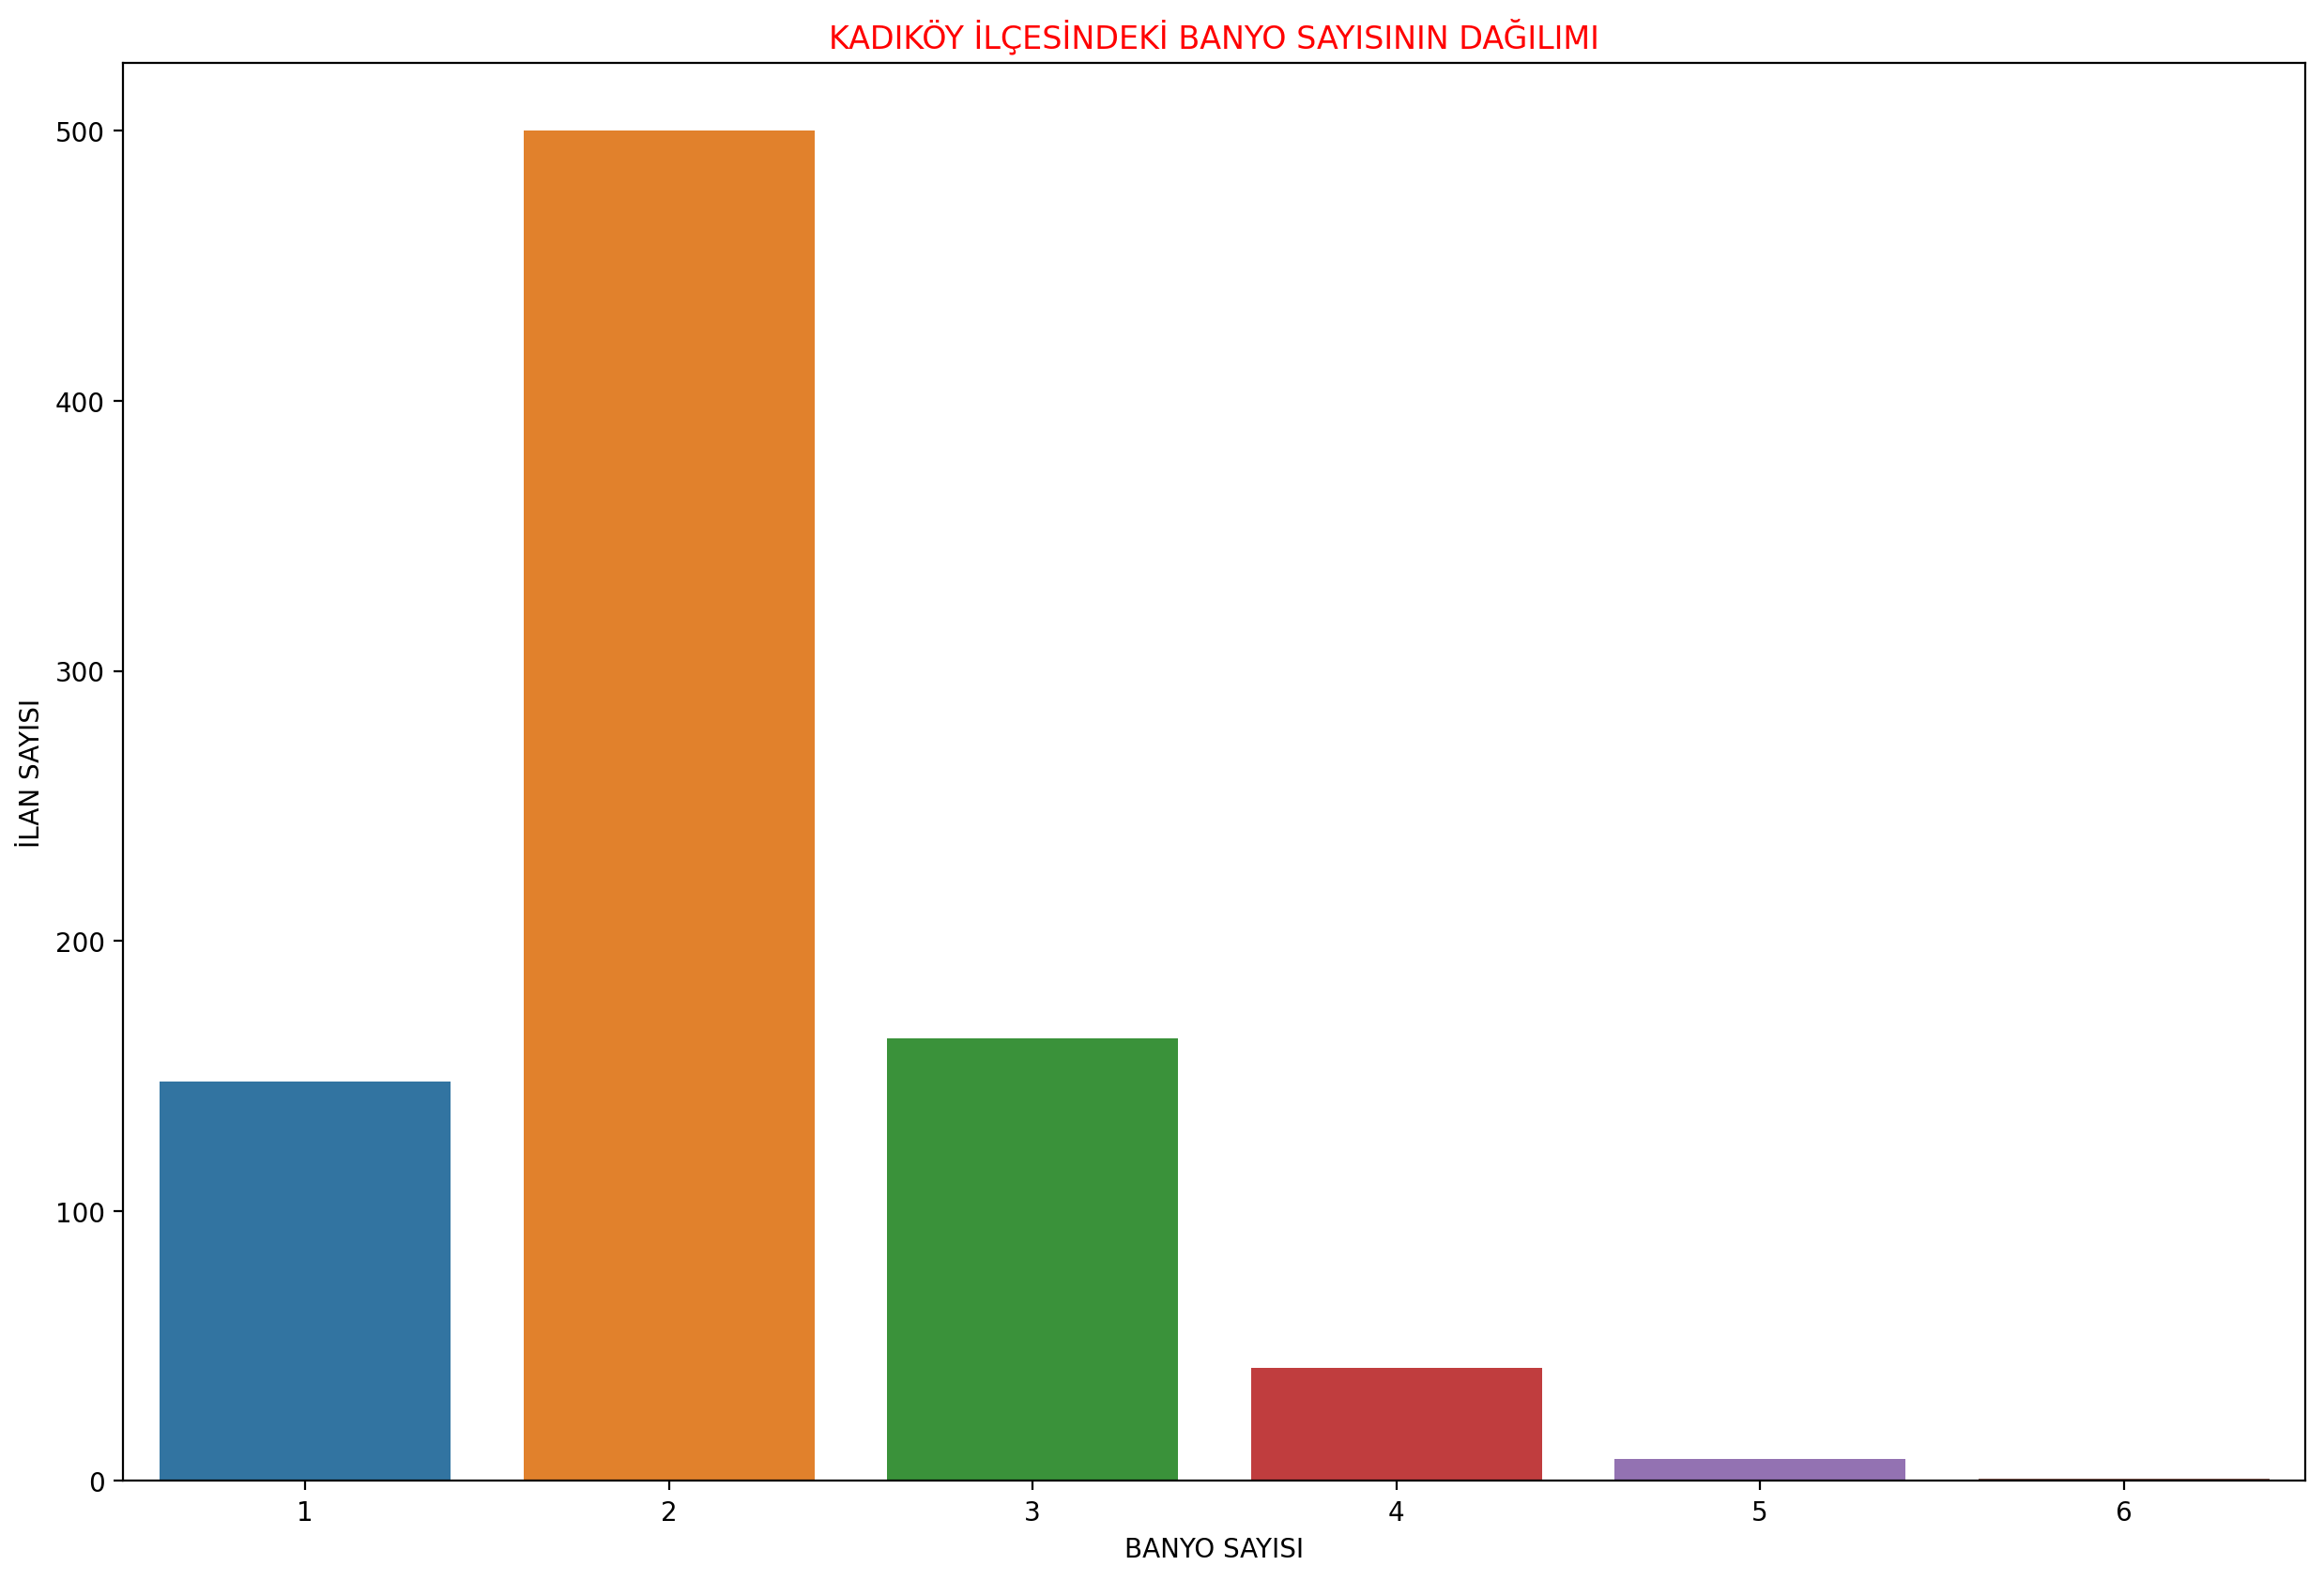

In [33]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("KADIKÖY İLÇESİNDEKİ BANYO SAYISININ DAĞILIMI", c="red")
sns.barplot(x = 'BANYO SAYISI', y = 'İLAN ADI', data = banyo)
plt.ylabel("İLAN SAYISI")
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project2/03_DistributionofNumberofBath.png', dpi=200)

In [34]:
mahalle = df.groupby("MAHALLE").count().iloc[:,0:1].reset_index().head(10)
mahalle_sort = mahalle.sort_values("İLAN ADI", ascending=False)
mahalle_sort

,MAHALLE,İLAN ADI
8,Fenerbahçe,133
3,Caddebostan,110
6,Erenköy,91
2,Bostancı,54
9,Feneryolu,48
0,19 Mayıs,21
1,Acıbadem,15
4,Caferağa,8
7,Eğitim,6
5,Dumlupınar,2


Text(0, 0.5, 'İLAN SAYISI')

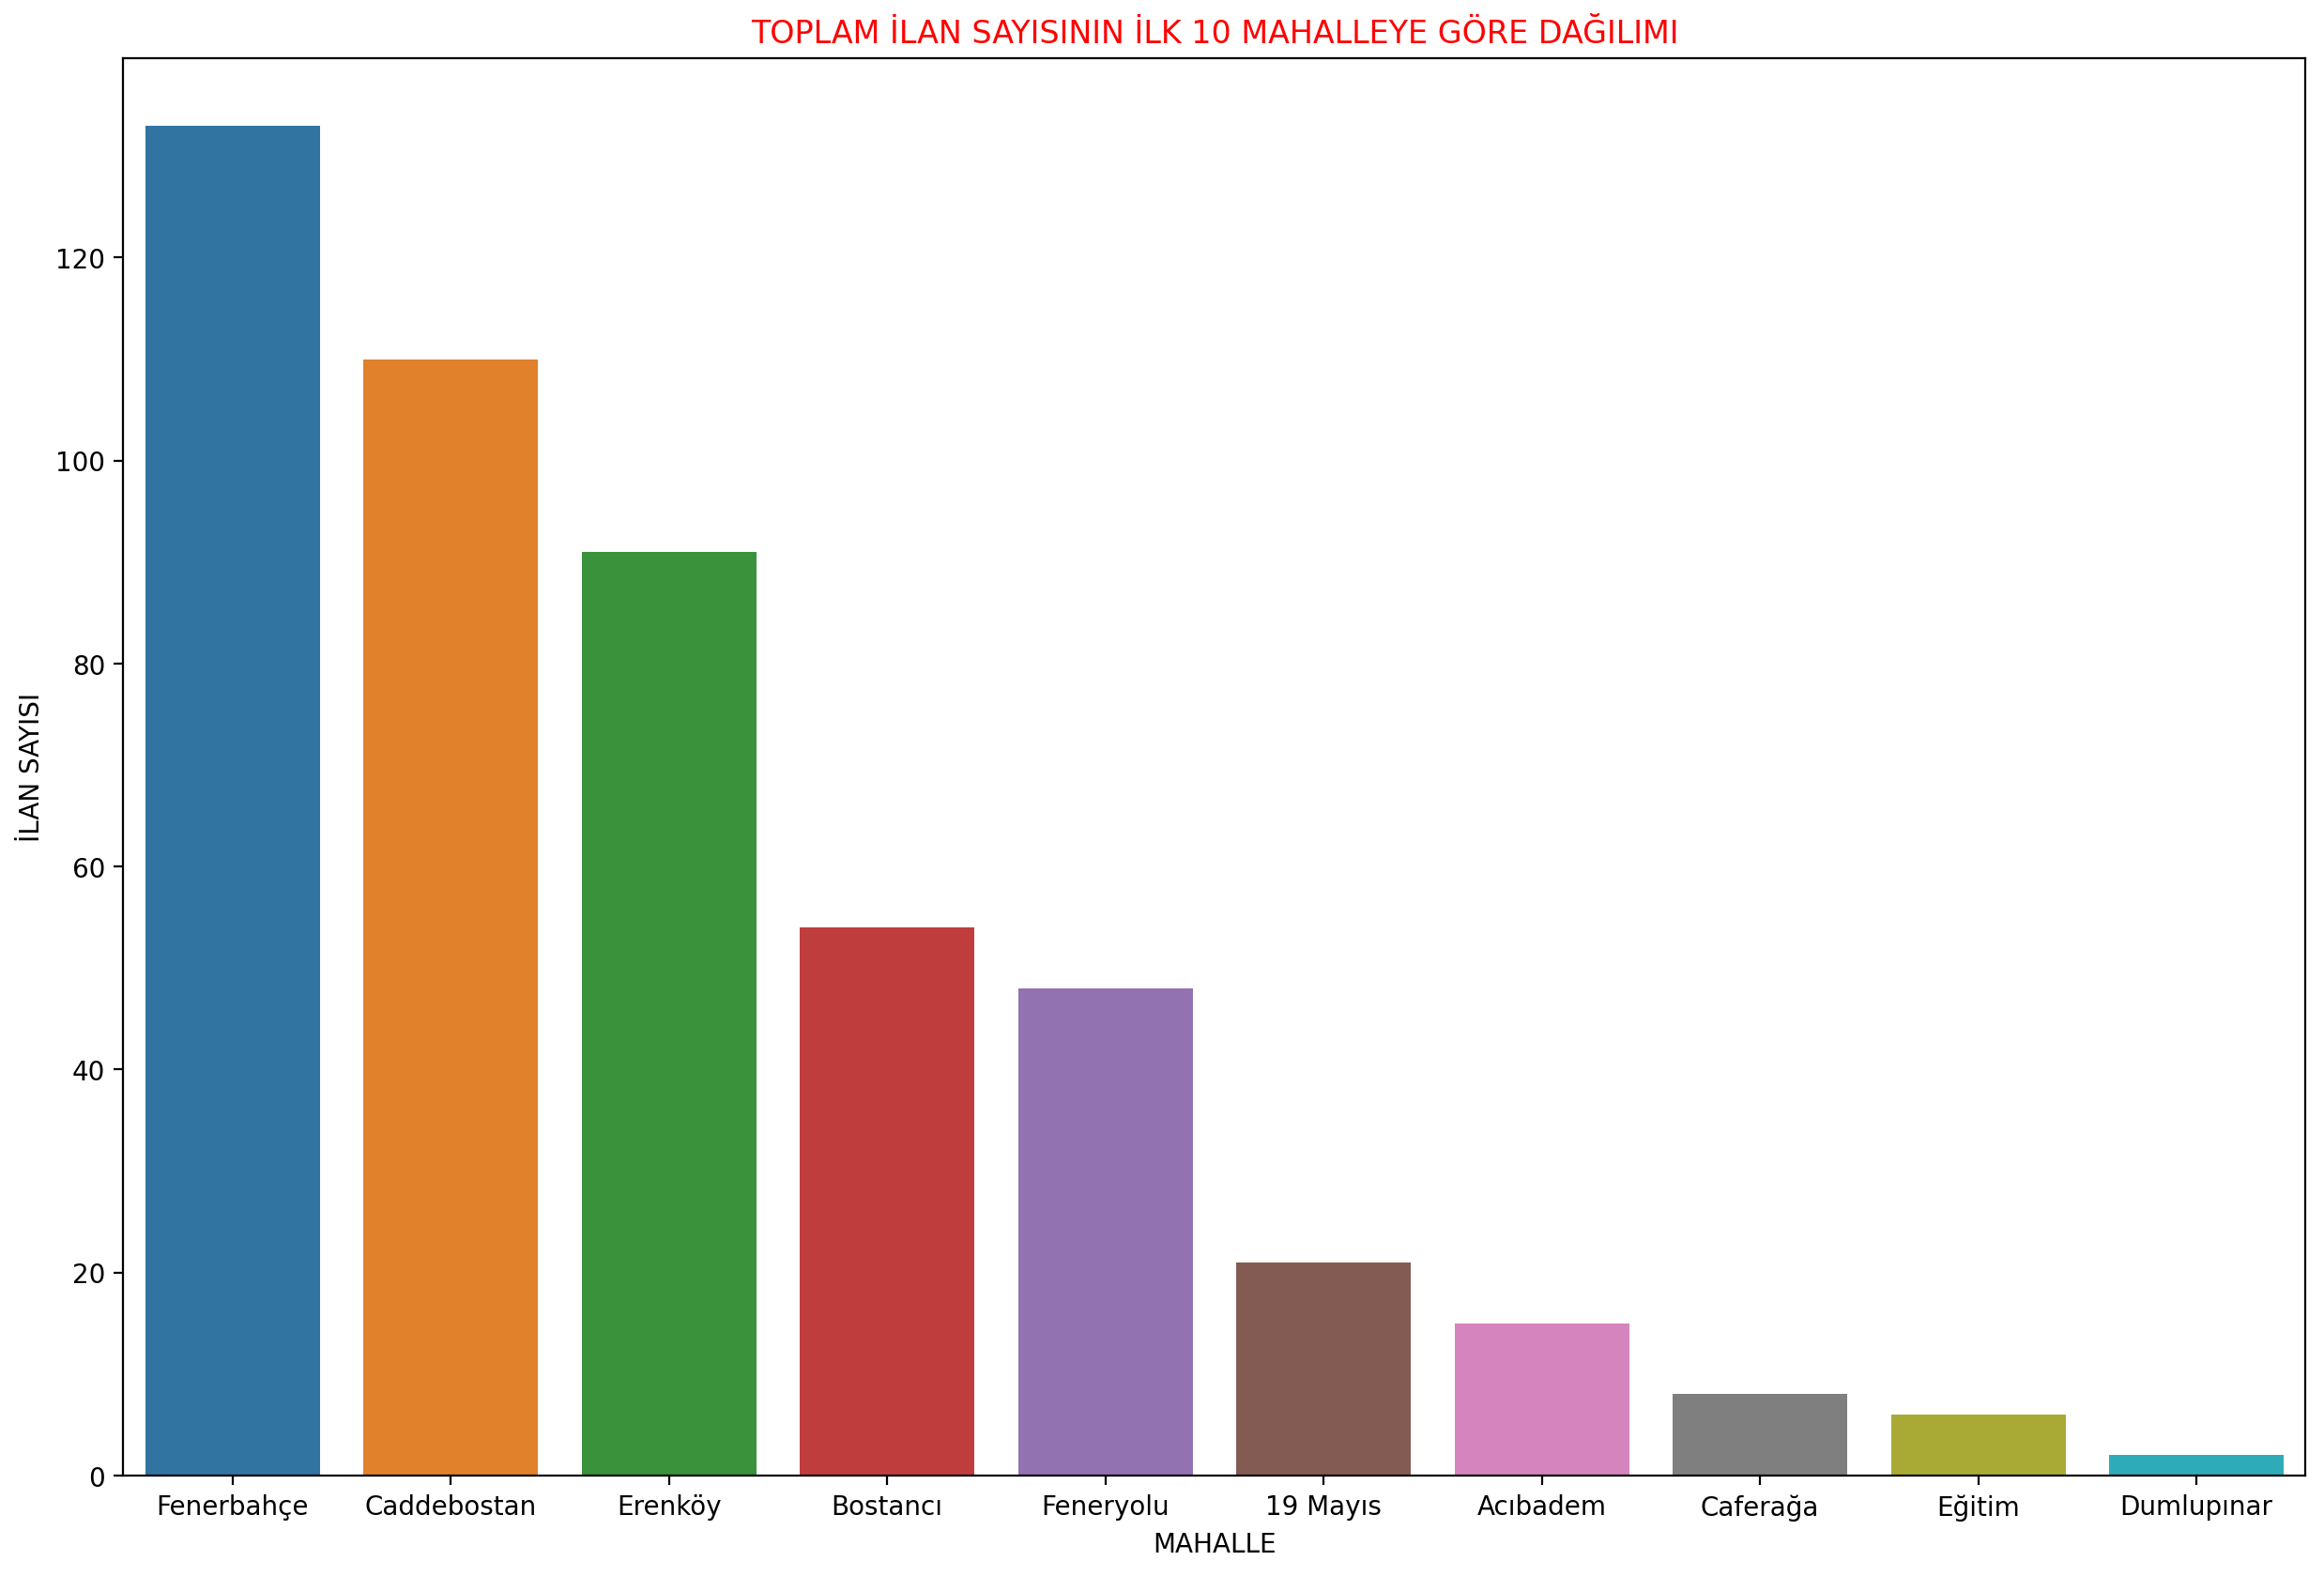

In [35]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("TOPLAM İLAN SAYISININ İLK 10 MAHALLEYE GÖRE DAĞILIMI", c="red")
sns.barplot(x = 'MAHALLE', y = 'İLAN ADI', data = mahalle_sort)
plt.ylabel("İLAN SAYISI")
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project2/04_DistributionofTotalHousePosting.png', dpi=200)

In [36]:
new_df.corr()

,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI,MAHALLE_19 Mayıs,MAHALLE_Acıbadem,MAHALLE_Bostancı,...,MAHALLE_Göztepe,MAHALLE_Hasanpaşa,MAHALLE_Kozyatağı,MAHALLE_Koşuyolu,MAHALLE_Merdivenköy,MAHALLE_Osmanağa,MAHALLE_Rasimpaşa,MAHALLE_Sahrayı Cedit,MAHALLE_Suadiye,MAHALLE_Zühtüpaşa
FİYAT,1.000000,0.657708,0.679897,0.494662,0.377740,-0.047480,0.151418,-0.083492,0.006610,-0.099072,...,-0.125794,-0.054433,-0.090484,-0.036032,-0.112417,-0.051532,-0.063034,-0.088318,0.069196,-0.038449
NET(m²),0.657708,1.000000,0.972476,0.799581,0.671144,-0.032802,0.282448,-0.030931,0.058002,-0.023059,...,-0.110374,-0.047922,-0.050880,-0.008308,-0.113852,-0.020364,-0.032836,-0.061152,0.004003,-0.023809
BRÜT(m²),0.679897,0.972476,1.000000,0.821829,0.661034,-0.028701,0.273341,-0.032299,0.022983,-0.038268,...,-0.099697,-0.055806,-0.060278,-0.023807,-0.110574,-0.033988,-0.024064,-0.069655,0.017424,-0.019443
ODA SAYISI,0.494662,0.799581,0.821829,1.000000,0.507058,-0.027143,0.319695,0.010210,0.035383,-0.030597,...,-0.048894,-0.044312,-0.052786,0.002013,-0.119408,-0.044312,-0.044841,-0.079647,-0.019318,-0.021150
SALON SAYISI,0.377740,0.671144,0.661034,0.507058,1.000000,0.030224,0.182864,-0.035824,0.004885,0.060047,...,-0.087605,-0.022481,0.044411,0.038148,-0.071847,0.038148,-0.027550,-0.053001,0.032224,-0.022481
BANYO SAYISI,-0.047480,-0.032802,-0.028701,-0.027143,0.030224,1.000000,0.063835,-0.010510,-0.080315,-0.024050,...,0.016960,-0.069389,0.048603,-0.008962,-0.009331,-0.039176,0.112433,-0.047031,0.096836,-0.039176
FOTOĞRAF SAYISI,0.151418,0.282448,0.273341,0.319695,0.182864,0.063835,1.000000,0.025967,0.024652,0.022657,...,0.017285,0.022171,-0.076366,-0.044016,-0.076366,-0.051959,0.019599,-0.098097,0.072751,-0.065196
MAHALLE_19 Mayıs,-0.083492,-0.030931,-0.032299,0.010210,-0.035824,-0.010510,0.025967,1.000000,-0.021004,-0.040802,...,-0.063774,-0.007611,-0.024325,-0.007611,-0.024325,-0.007611,-0.009327,-0.017944,-0.084195,-0.007611
MAHALLE_Acıbadem,0.006610,0.058002,0.022983,0.035383,0.004885,-0.080315,0.024652,-0.021004,1.000000,-0.034361,...,-0.053708,-0.006410,-0.020486,-0.006410,-0.020486,-0.006410,-0.007855,-0.015112,-0.070905,-0.006410
MAHALLE_Bostancı,-0.099072,-0.023059,-0.038268,-0.030597,0.060047,-0.024050,0.022657,-0.040802,-0.034361,1.000000,...,-0.104331,-0.012452,-0.039795,-0.012452,-0.039795,-0.012452,-0.015259,-0.029356,-0.137738,-0.012452


<AxesSubplot:title={'center':'EV ÖZELLİKLERİNE AİT KORELASYON MATRİSİ'}>

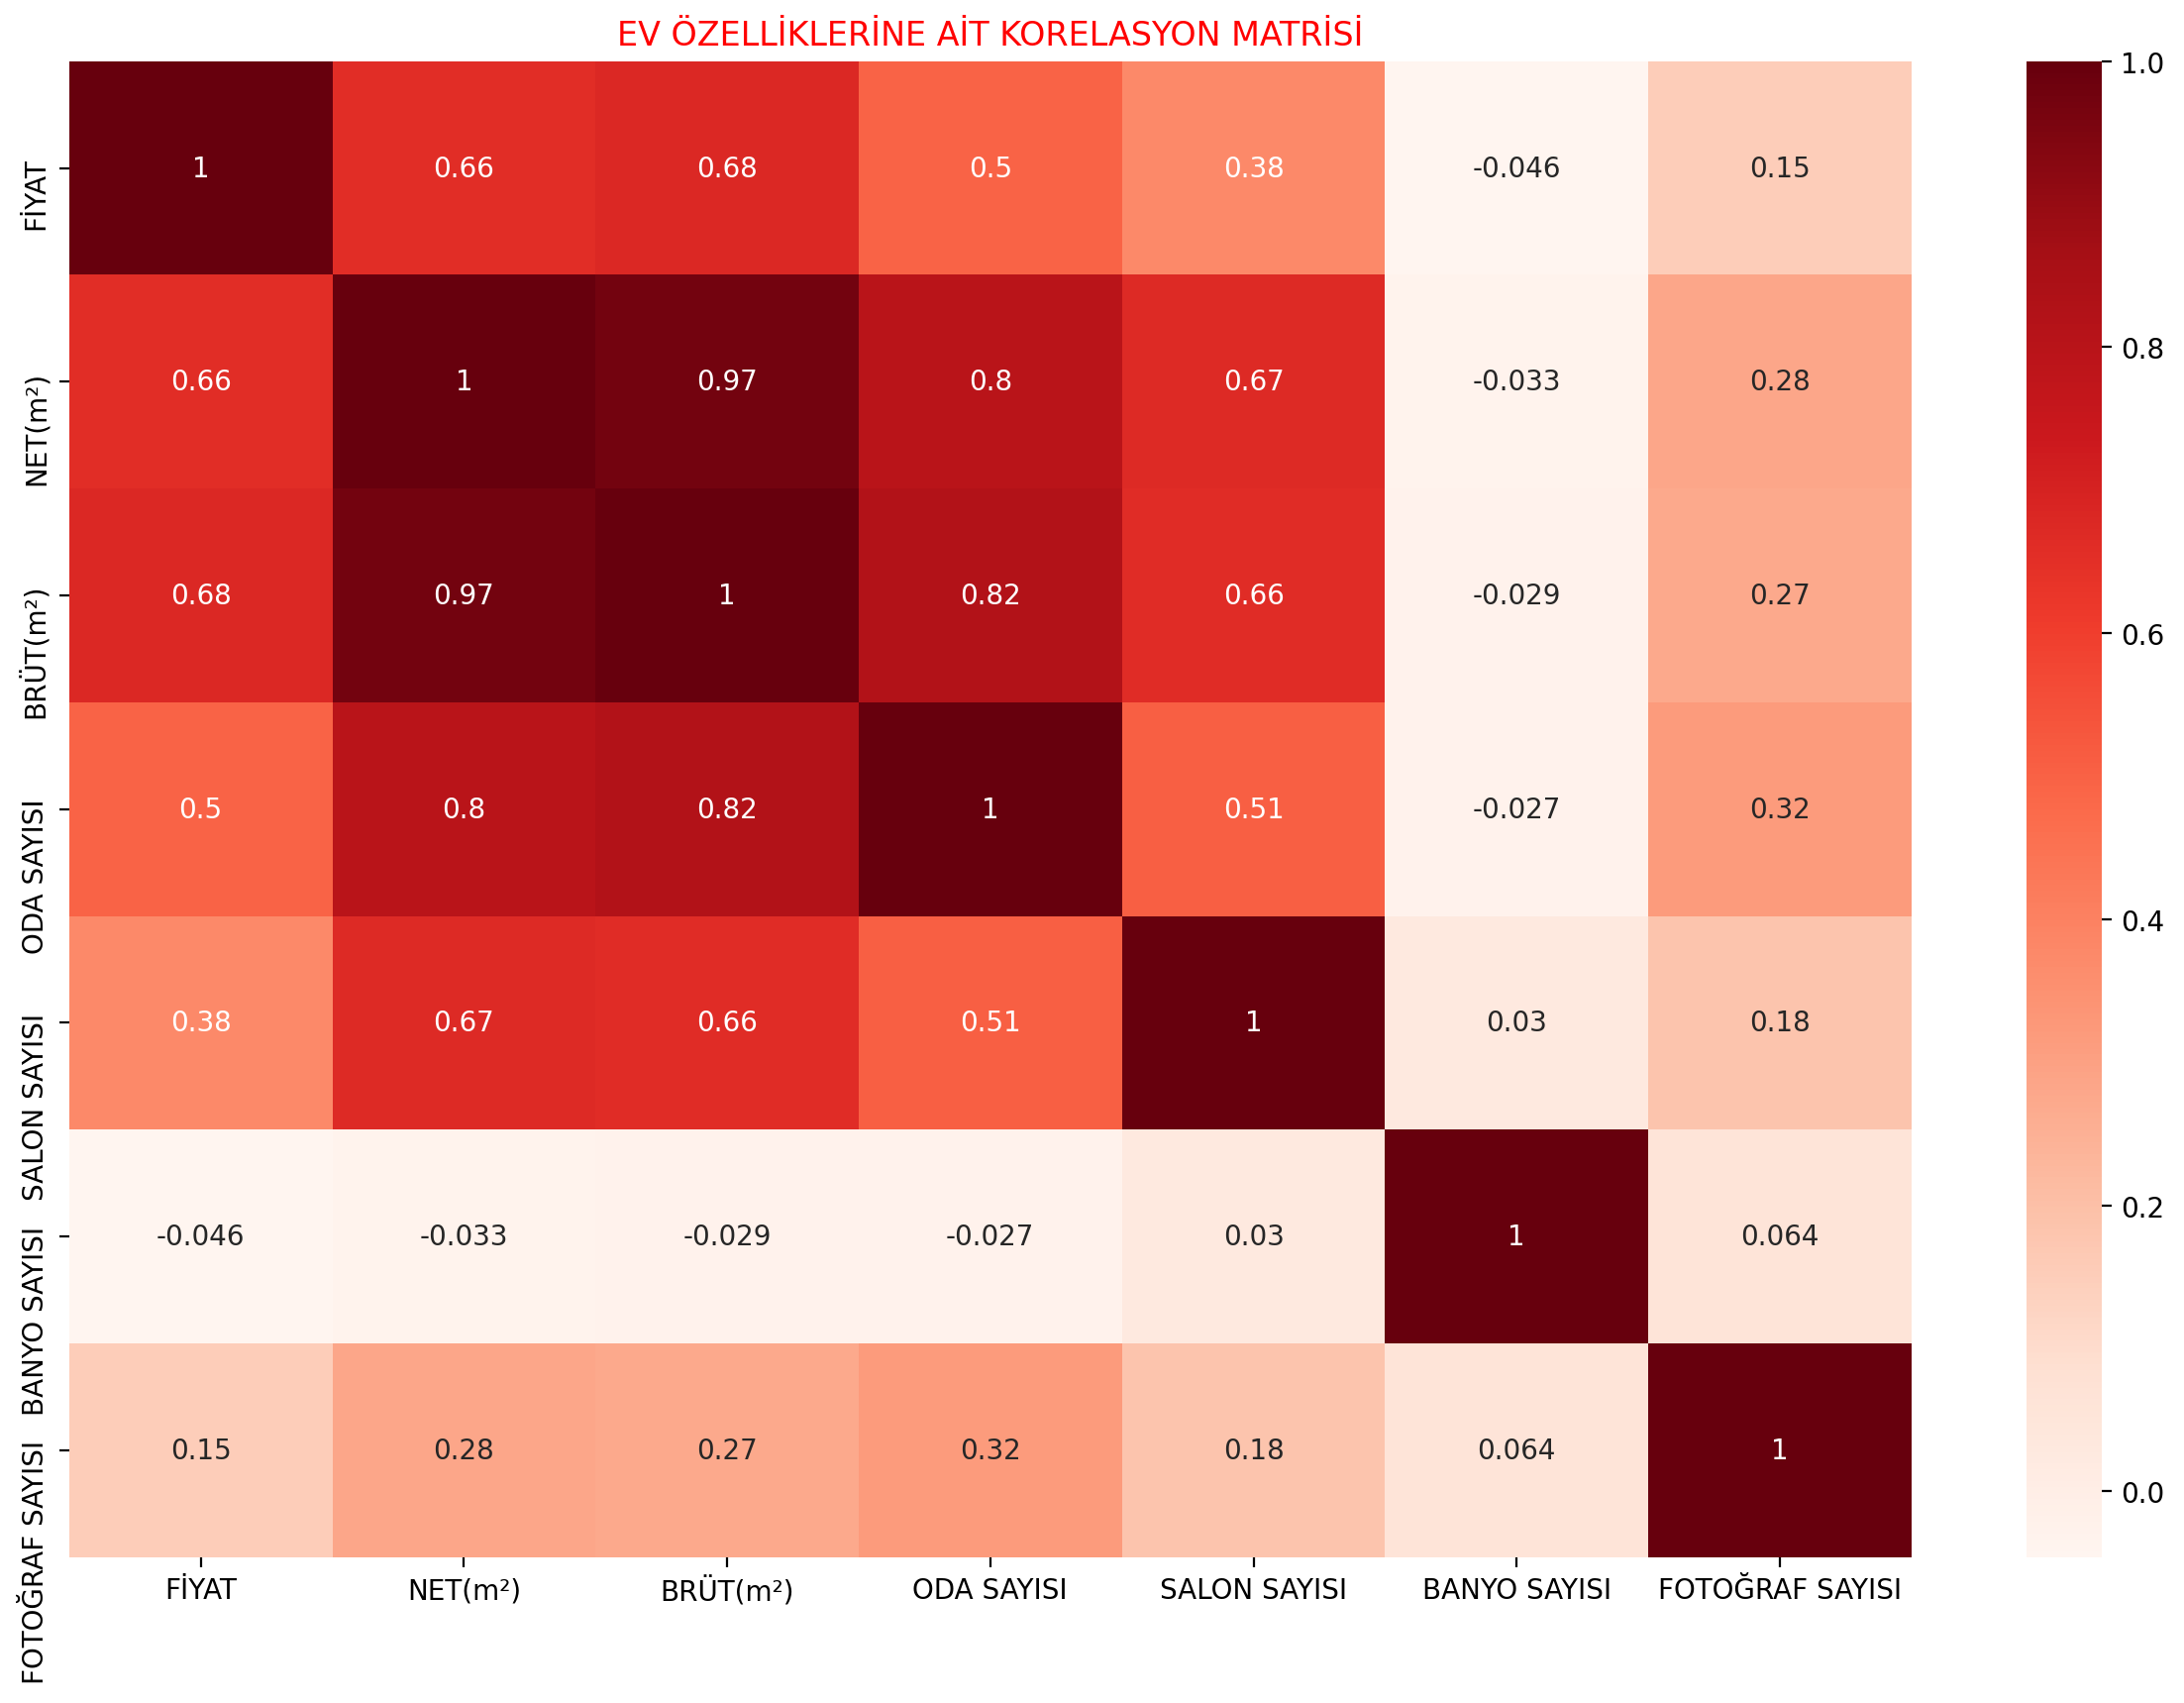

In [37]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("EV ÖZELLİKLERİNE AİT KORELASYON MATRİSİ", c="red")
sns.heatmap(DF.corr(), cmap="Reds", annot=True)
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project2/05_CorrelationMatrixofHouseAttributes.png', dpi=200)

In [38]:
other_df = new_df.drop(columns=["NET(m²)","BRÜT(m²)","ODA SAYISI","SALON SAYISI","BANYO SAYISI","FOTOĞRAF SAYISI"])
other_df

,FİYAT,MAHALLE_19 Mayıs,MAHALLE_Acıbadem,MAHALLE_Bostancı,MAHALLE_Caddebostan,MAHALLE_Caferağa,MAHALLE_Dumlupınar,MAHALLE_Erenköy,MAHALLE_Eğitim,MAHALLE_Fenerbahçe,...,MAHALLE_Göztepe,MAHALLE_Hasanpaşa,MAHALLE_Kozyatağı,MAHALLE_Koşuyolu,MAHALLE_Merdivenköy,MAHALLE_Osmanağa,MAHALLE_Rasimpaşa,MAHALLE_Sahrayı Cedit,MAHALLE_Suadiye,MAHALLE_Zühtüpaşa
0,12950000,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,11400000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3350000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,850000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3750000,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,3800000,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
868,2850000,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
869,7600000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
870,1150000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:title={'center':'EVİN BULUNDUĞU MAHALLEYE AİT KORELASYON MATRİSİ'}>

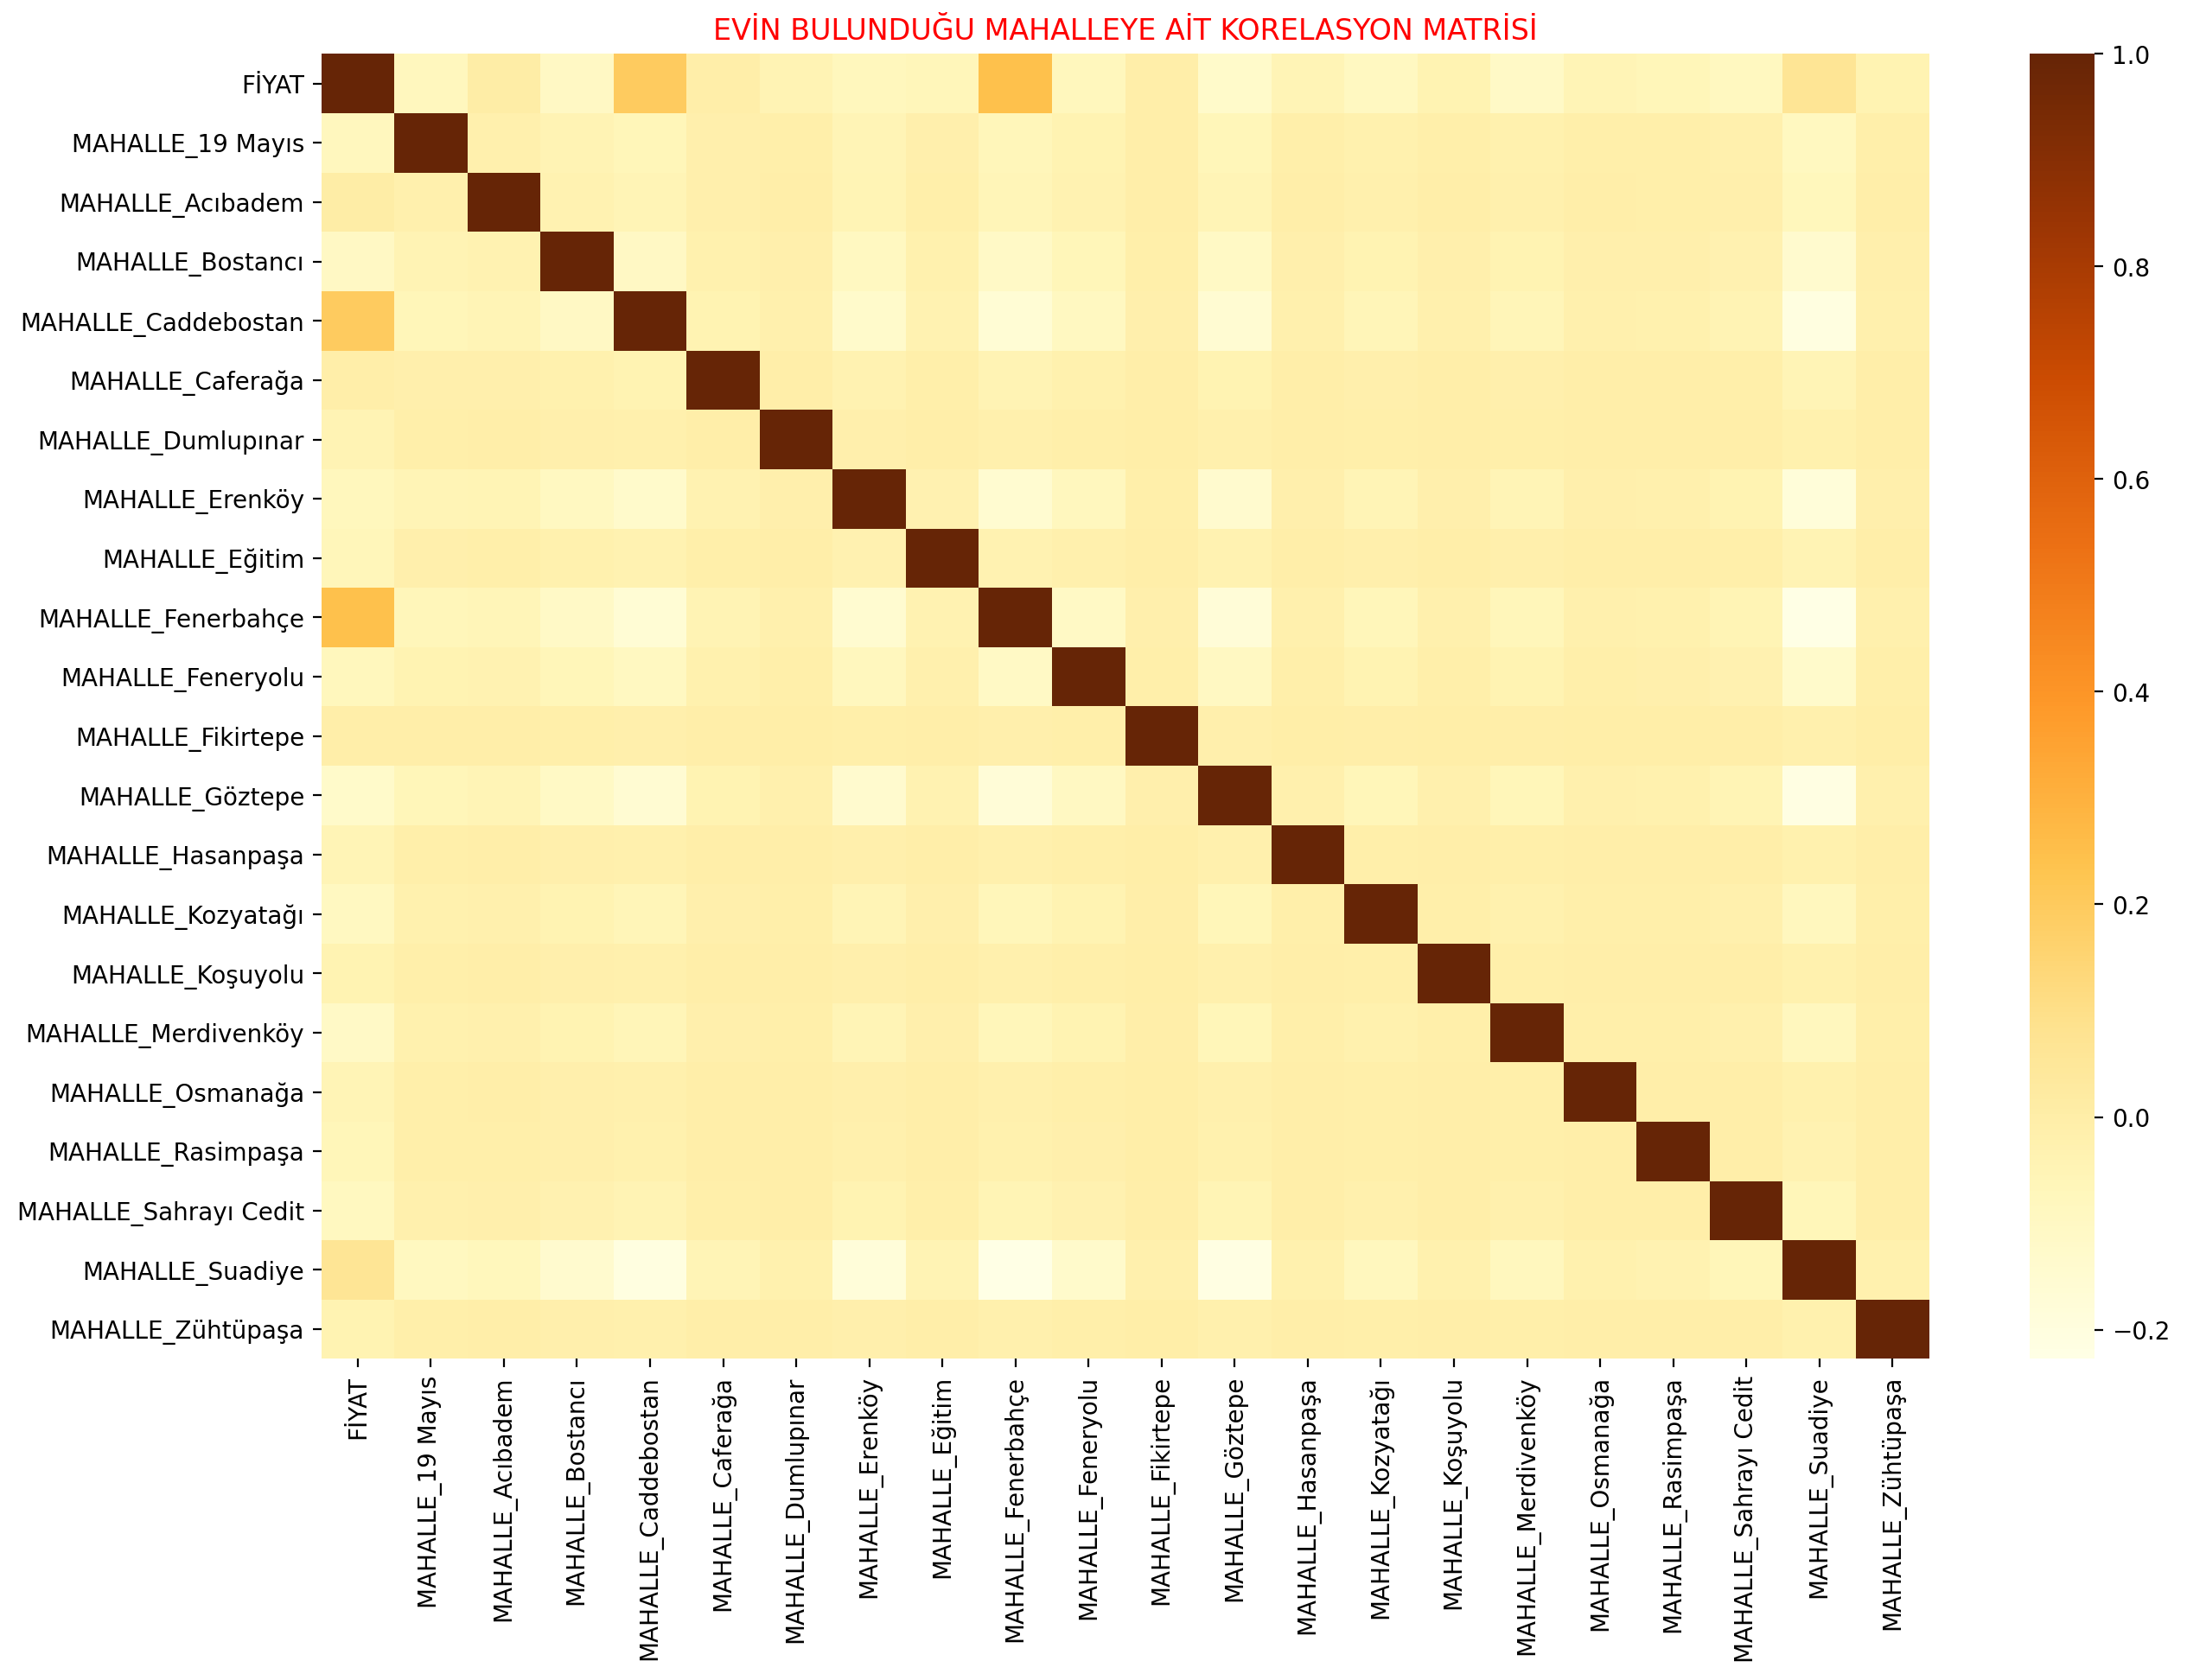

In [39]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("EVİN BULUNDUĞU MAHALLEYE AİT KORELASYON MATRİSİ", c="red")
sns.heatmap(other_df.corr(), cmap="YlOrBr")
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project2/06_CorrelationMatrixofNeighbourhood.png', dpi=200)

## Linear Regression

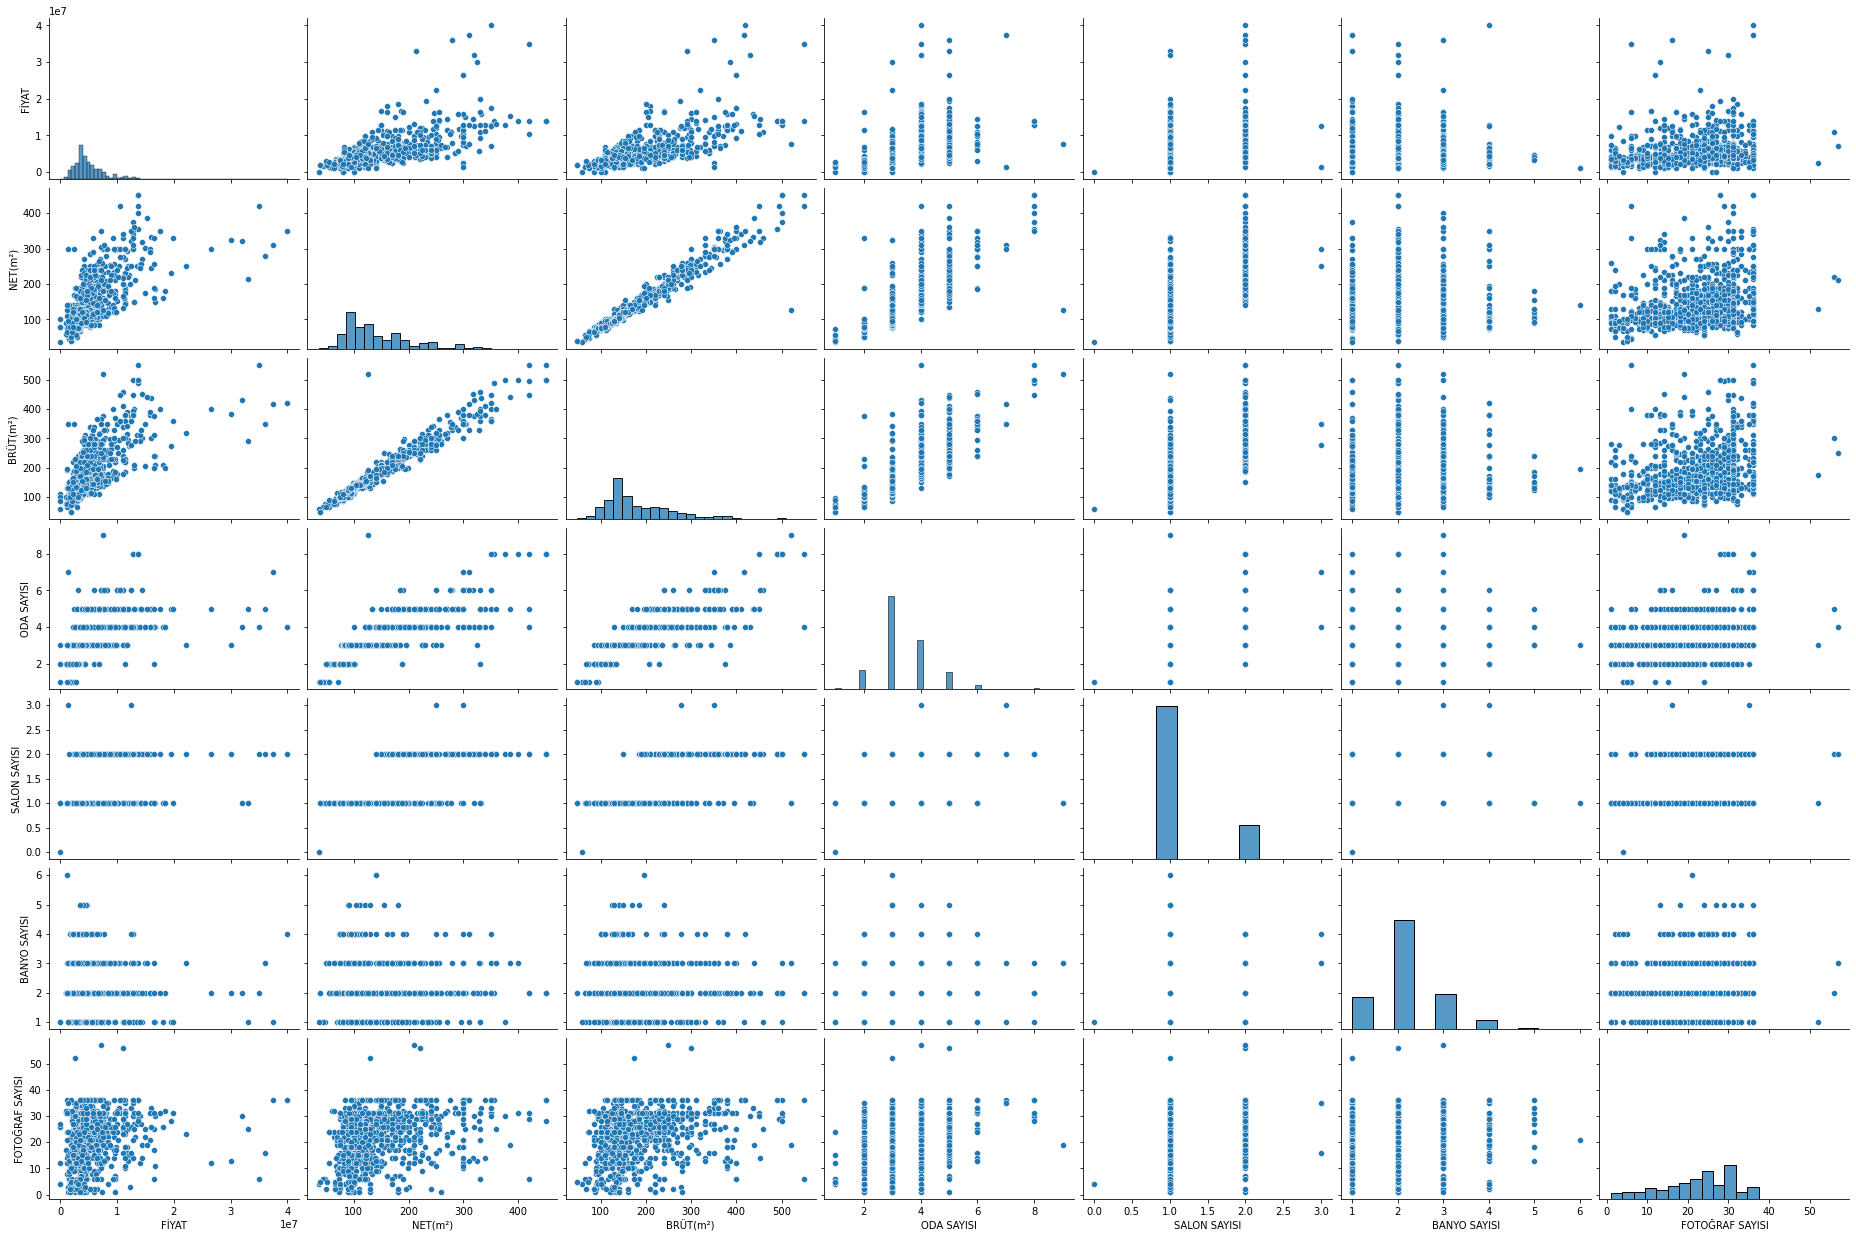

In [40]:
sns.pairplot(DF, aspect=1.5)
plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project2/07_DistributionofAttributes.png', dpi=200)

In [41]:
X = new_df.iloc[:,1:]
Y = new_df.iloc[:,:1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state=20)

lr_model = LinearRegression()

lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_val)

print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

print("R^2 Score Value (Test): ", lr_model.score(x_test, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model.score(x_val, y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

MSE Value:  FİYAT    5.757277e+12
dtype: float64 

R^2 Score Value (Test):  0.5801046663202141 

R^2 Score Value (Validation):  0.5690857021978828 

Coefficients:
 [[ 1.13215557e+03  4.40273070e+04 -9.06922595e+05 -1.28357691e+06
  -1.46023969e+05  6.81309761e+03 -2.15186328e+05  1.18066808e+06
   9.07494789e+02  2.26814632e+06 -9.75259280e+05 -4.03834562e+05
   6.71247943e+05 -1.07327632e+06  3.08576609e+06  4.34953487e+04
   5.04808621e+05  5.14622275e+05 -5.37321525e+05 -3.05803482e+03
   7.27477003e+05 -1.76187978e+04 -1.75511389e+06 -3.96373741e+06
  -3.51545465e+05  1.58357672e+06 -1.28476427e+06]]


In [42]:
x = new_df.loc[:,["NET(m²)", "BRÜT(m²)", "ODA SAYISI", "SALON SAYISI"]]
y = new_df.iloc[:,:1]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=20)
X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size=0.25, random_state=20)

lr_model = LinearRegression()

lr_model.fit(X_train, Y_train)
new_pred = lr_model.predict(X_val)

print("MSE Value: ", np.mean((new_pred - Y_val)**2), "\n")

print("R^2 Score Value (Test): ", lr_model.score(X_test, Y_test), "\n")
S
print("R^2 Score Value (Validation): ", lr_model.score(X_val, Y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

MSE Value:  FİYAT    6.274632e+12
dtype: float64 

R^2 Score Value (Test):  0.5438016679245479 

R^2 Score Value (Validation):  0.5303632838955692 

Coefficients:
 [[    2634.81814019    46304.91608731  -795349.66149337 -1647654.25206824]]


In [43]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.values)
x_test_scaled = scaler.fit_transform(x_test.values)
x_val_scaled = scaler.fit_transform(x_val.values)

lr_model_ridge = Ridge(alpha=0.05, normalize=True)

lr_model_ridge.fit(x_train_scaled, y_train)

print("R^2 Score Value (Test): ", lr_model_ridge.score(x_test_scaled, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model_ridge.score(x_val_scaled, y_val))

R^2 Score Value (Test):  0.5793058427962506 

R^2 Score Value (Validation):  0.563142565405035


C:\Users\ataoz\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [44]:
lr_model_lasso = Lasso(alpha=0.05, normalize=True)

lr_model_lasso.fit(x_train_scaled, y_train)

print("R^2 Score Value (Test): ", lr_model_lasso.score(x_test_scaled, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model_lasso.score(x_val_scaled, y_val))

R^2 Score Value (Test):  0.5837754090161392 

R^2 Score Value (Validation):  0.5620382643849704


C:\Users\ataoz\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\ataoz\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisat